# **Start Section:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Uninstall existing scikit-learn to avoid conflicts
!pip uninstall -y scikit-learn
# Install specific versions of libraries to avoid conflicts
!pip install scikit-learn==1.5.2
!pip install bayesian-optimization
!pip install optuna
!pip install gpboost==1.6.1
!pip install shap
!pip install ngboost
!pip install dask[dataframe]
!pip install torch seaborn
!pip install lightgbm
!pip install xgboost
!pip install lime
!pip install interpret
!pip install optunahub
!pip install cmaes
!pip install plotly kaleido
!pip install openpyxl
!pip install -U kaleido
!pip install properscoring
!pip install XlsxWriter
!pip install cython
!pip install pgbm
!pip install torch
!pip install cp
!pip install mapie==0.6.0
!pip install torch skorch puncc
# Reinstall scikit-learn to the version required by ngboost
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.6.1
# Reinstall numpy first
!pip install numpy==1.26.4  # Use the version compatible with catboost
# Reinstall catboost
!pip install catboost
!pip install pytorch-tabnet2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 87.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 7.9 MB/s eta 0:00:00


In [ ]:
# Restart the runtime to apply changes
import os
os._exit(00)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.svm import SVR
import ngboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from gpboost import GPBoostRegressor
from ngboost import NGBRegressor
import optuna
import optunahub
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from interpret import show
from interpret.blackbox import LimeTabular, ShapKernel
from optuna.samplers import RandomSampler
import random
import time
from ngboost.distns import Normal
from ngboost.scores import LogScore
from scipy.stats import norm
from optuna.samplers import BaseSampler
from optuna.samplers import GridSampler
from optuna.samplers import TPESampler
from optuna.samplers import PartialFixedSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import QMCSampler
from optuna.samplers import NSGAIIISampler
from optuna.samplers import NSGAIISampler
from optuna.samplers import BruteForceSampler
from optuna.samplers import GPSampler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import plotly.express as px
from io import BytesIO
from openpyxl import Workbook, load_workbook
import os
import properscoring as ps
import io
from openpyxl.drawing.image import Image as openpyxlImage
import warnings
import xlsxwriter
from openpyxl.drawing.image import Image
from pgbm.sklearn import HistGradientBoostingRegressor
import torch
from pgbm.torch import PGBM
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import pickle
import json
from mapie.subsample import Subsample
from mapie.regression import MapieRegressor
from deel.puncc.metrics import regression_sharpness, regression_mean_coverage
from deel.puncc.api.prediction import BasePredictor, DualPredictor
from deel.puncc.regression import SplitCP, CVPlus, CQR
from deel.puncc.plotting import plot_prediction_intervals
from sklearn.model_selection import train_test_split
from typing_extensions import TypedDict
from typing import Union
from mapie.metrics import regression_coverage_score
from sklearn.model_selection import KFold
from PIL import Image as PImage
from openpyxl.utils.dataframe import dataframe_to_rows
from pytorch_tabnet import TabNetRegressor

W1111 05:20:44.504000 2838 torch/utils/cpp_extension.py:118] No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [2]:
train_data_path = "./drive/MyDrive/streamflow/TDS/train.csv"
test_data_path = "./drive/MyDrive/streamflow/TDS/test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print("Training data loaded successfully.")
print("Test data loaded successfully.")

Training data loaded successfully.
Test data loaded successfully.


In [3]:
print("\nShape of training data:", train_data.shape)
print("First 5 rows of training data:\n", train_data.head(5))
print("\nShape of test data:", test_data.shape)
print("First 5 rows of test data:\n", test_data.head(5))


Shape of training data: (192, 5)
First 5 rows of training data:
     pH  Salinity  Turbidity   Water Temperature  TDS
0  7.6       0.2         3.0               19.9  290
1  7.4       0.1         0.5               20.7  120
2  7.3       0.2        10.7               23.6  200
3  8.0       0.1         3.0               27.0   94
4  7.8       0.4         1.4               28.4  330

Shape of test data: (96, 5)
First 5 rows of test data:
     pH  Salinity  Turbidity   Water Temperature  TDS
0  7.2       0.1         9.1               18.8  160
1  7.4       0.2         3.7               26.3  190
2  7.0       0.1         3.0               21.6  180
3  8.1       0.1         2.2               17.2  110
4  7.9       0.1        14.1               27.0  200


In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
x_test= X_test
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (192, 4)
Shape of y_train: (192,)
Shape of X_test: (96, 4)
Shape of y_test: (96,)


In [5]:
# Apply z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the first five rows of the normalized data
print("\nFirst five rows of normalized X_train:")
print(X_train[:5])

print("\nFirst five rows of normalized X_test:")
print(X_test[:5])


First five rows of normalized X_train:
[[-0.1272241   0.06262254 -0.51513341 -1.14481478]
 [-0.57957647 -0.38434874 -0.6817983  -0.97088446]
 [-0.80575265  0.06262254 -0.00180554 -0.34038706]
 [ 0.77748062 -0.38434874 -0.51513341  0.39881678]
 [ 0.32512826  0.95656508 -0.62179894  0.70319483]]

First five rows of normalized X_test:
[[-1.03192883 -0.38434874 -0.10847107 -1.38396896]
 [-0.57957647  0.06262254 -0.46846724  0.24662775]
 [-1.48428119 -0.38434874 -0.51513341 -0.77521285]
 [ 1.00365681 -0.38434874 -0.56846617 -1.73182959]
 [ 0.55130444 -0.38434874  0.22485872  0.39881678]]


# **Functions:**

In [6]:
feature_names = ['ph', 'Salinity', 'Turbidity', 'Water Temperature']


In [7]:
def get_best_model_params(results, model_name):
    # Map model names to dictionary keys, assuming keys are strings like 'XGBoost' and not objects
    model_keys = {
        'LightGBM': 'LightGBM',
        'XGBoost': 'XGBoost',
        'GPBoost': 'GPBoost',
        'GBM': 'Gradient Boosting',
        'CatBoost': 'CatBoost',
        'NGBoost': 'NGBoost',
        'HGBR' : 'HistGradientBoosting',
        'PGBM' : 'PGBM',
        'TabNet' : 'TabNet'

    }

    # Ensure the requested model name is valid
    if model_name not in model_keys:
        raise ValueError(f"Model name '{model_name}' is not recognized. Available models are: {list(model_keys.keys())}")

    # Filter out entries for the specified model
    model_entries = {key: value for key, value in results.items() if key[0] == model_keys[model_name]}

    # Find the entry with the best (lowest) 'best_score'
    best_entry_key, best_entry_value = min(model_entries.items(), key=lambda item: item[1]['best_score'])

    # Return the best hyperparameters
    return best_entry_value['best_params']

In [8]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test.to_numpy()[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test.to_numpy()[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test.to_numpy() >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.to_numpy().ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

def conformal_predictions_MAPIE(model_class, best_params, X_train, y_train, X_test, y_test, model_name, excel_file_path):
    """
    Train and plot conformal prediction intervals using different strategies and save the plots and
    table of ymin/ymax/y_pred to different worksheets in an Excel file for each strategy.

    Parameters:
    - model_class: The class of the model to be used (e.g., LGBMRegressor).
    - best_params: Dictionary of best parameters for the model.
    - X_train: Training features.
    - y_train: Training target.
    - X_test: Test features.
    - y_test: Test target.
    - model_name: Name of the model for labeling purposes.
    - excel_file_path: Path to the Excel file where the plots will be saved.
    """
    # Set random seed for reproducibility
    SEED: int = 123
    np.random.seed(SEED)

    # Define miscoverage
    MISCOVERAGE: float = 0.1  # MISCOVERAGE = alpha # CONFIDENCE = 1-alpha
    warnings.filterwarnings("ignore")  # to suppress them

    # Create output directory
    os.makedirs('output/regression', exist_ok=True)

    # Define strategies and parameters
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 5},                                    # 10  is changed to 5 {'method': "plus", 'cv': 10}
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Define base estimators
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    # Train strategies using MAPIE
    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set

    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred) # Corrected line: Removed y_test
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test.to_numpy() - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the results for the test set
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names) * 3 + 1 + len(_strategies) # Strategy plots + Goodness plots + Width plots + Comparison plot + Coverage vs Width plots
    fig, axs = plt.subplots(nrows=n_figs, figsize=(10, 5 * n_figs))

    plot_index = 0 # Keep track of the current plot index

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up, color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red', label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('Scour')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Combined plot for comparison
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up, alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name], label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('Scour')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1

    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted Scour')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1

    plt.tight_layout()

    # Save plots and tabular data to Excel
    with io.BytesIO() as buf:
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet for the plots
        workbook = load_workbook(excel_file_path)
        plot_sheet_name = 'conformal_predictions_MAPIE'
        if plot_sheet_name in workbook.sheetnames:
            plot_sheet_name += '_new'
        plot_worksheet = workbook.create_sheet(title=plot_sheet_name)
        plot_worksheet.add_image(img, 'A1')

        all_rows = []
        y_true_np = y_test.to_numpy().ravel()  # To save multiple conversions
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = (y_true_np >= ymin_np) & (y_true_np <= ymax_np)
            residual_np = y_true_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_true_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np.astype(int),
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet.cell(row=i+2, column=j, value=value)

        # Save the workbook
        workbook.save(excel_file_path)

    plt.close()

In [9]:
def conformal_predictions_PUNCC(
    X_train, y_train, X_test, y_test, best_scores_autosampler, model_class,
    excel_file_path=None, model_params=None, alpha=0.1
):
    # Determine the default parameters for the model, or use provided ones
    if model_params is None:
        if model_class.__name__ == 'LGBMRegressor':
            model_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
        else:
            model_params = {}

    # Initialize and train the model using the provided class and parameters
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    model.fit(X_train, y_train)

    def evaluate_cp(X_test, y_test, model_cp, alpha):
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test, alpha=alpha)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)
        return sharpness, coverage

    # Wrap the model in a BasePredictor
    base_predictor = BasePredictor(model, is_trained=True)

    # Initialize and fit the SplitCP conformal predictor
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train, fit_ratio=0.5)

    # Compute prediction intervals and metrics on the test set using SplitCP
    y_pred_splitcp, y_pred_lower_splitcp, y_pred_upper_splitcp = splitcp.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, splitcp, alpha)
    picp_splitcp = np.mean((y_test >= y_pred_lower_splitcp) & (y_test <= y_pred_upper_splitcp))
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"SplitCP - Average coverage: {coverage*100:.3f}%")
    print(f"SplitCP - PICP: {picp_splitcp*100:.3f}%")

    # Plot the prediction intervals for SplitCP
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))

    axs[0].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[0].fill_between(np.arange(len(y_test)), y_pred_lower_splitcp, y_pred_upper_splitcp, color='gray', alpha=0.5, label='Prediction interval')
    axs[0].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[0].set_title('Split Conformal Prediction')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Scour')
    axs[0].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Initialize and fit the CVPlus conformal predictor
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train)

    # Compute prediction intervals and metrics on the test set using CVPlus
    y_pred_cvplus, y_pred_lower_cvplus, y_pred_upper_cvplus = cvplus.predict(X_test, alpha=alpha)
    sharpness_cvplus, coverage_cvplus = evaluate_cp(X_test, y_test, cvplus, alpha)
    picp_cvplus = np.mean((y_test >= y_pred_lower_cvplus) & (y_test <= y_pred_upper_cvplus))

    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cvplus:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cvplus*100:.3f}%")
    print(f"CVPlus - PICP: {picp_cvplus*100:.3f}%\n")

    # Plot the prediction intervals for CVPlus
    axs[1].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[1].fill_between(np.arange(len(y_test)), y_pred_lower_cvplus, y_pred_upper_cvplus, color='gray', alpha=0.5, label='Prediction interval')
    axs[1].plot(np.arange(len(y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[1].set_title('Cross Validation Plus')
    axs[1].set_xlabel('Sample Number ')
    axs[1].set_ylabel('Scour')
    axs[1].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    # Split the training data into proper training (fit) set and calibration set
    X_fit, X_calib, y_fit, y_calib = train_test_split(
        X_train, y_train, test_size=0.5, random_state=0
    )

    # Fit the upper and lower quantile models
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)

    _ = upper_quantile_model.fit(X_fit, y_fit)
    _ = lower_quantile_model.fit(X_fit, y_fit)

    # Wrap the upper and lower quantile models in a dual predictor
    dualpredictor = DualPredictor(
        [lower_quantile_model, upper_quantile_model], is_trained=[True, True]
    )

    # Initialize the CQR conformal predictor
    cqr = CQR(
        dualpredictor, train=False
    )  # train=False to use the pre-trained dual predictor

    # Compute nonconformity scores on the calibration set
    cqr.fit(X_calib=X_calib, y_calib=y_calib)

    # Compute prediction intervals and metrics on the test set
    y_pred_cqr, y_pred_lower_cqr, y_pred_upper_cqr = cqr.predict(X_test, alpha=alpha)
    y_pred_cqr = 0.5 * (y_pred_lower_cqr + y_pred_upper_cqr)
    sharpness_cqr, coverage_cqr = evaluate_cp(X_test, y_test, cqr, alpha)
    picp_cqr = np.mean((y_test >= y_pred_lower_cqr) & (y_test <= y_pred_upper_cqr))

    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")
    print(f"CQR - PICP: {picp_cqr*100:.3f}%\n")

    # Plot the prediction intervals for CQR
    axs[2].scatter(np.arange(len(y_test)), y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[2].fill_between(np.arange(len(y_test)), y_pred_lower_cqr, y_pred_upper_cqr, color='gray', alpha=0.5, label='Prediction interval')
    axs[2].plot(np.arange(len(y_test)), y_pred_cqr, color='red', label='Predicted mean', linewidth=1)
    axs[2].set_title('Conformalized Quantile Regression')
    axs[2].set_xlabel('Sample Number')
    axs[2].set_ylabel('Scour')
    axs[2].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'SplitCP_lower': np.asarray(y_pred_lower_splitcp).reshape(-1),
        'SplitCP_upper': np.asarray(y_pred_upper_splitcp).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'CVPlus_lower': np.asarray(y_pred_lower_cvplus).reshape(-1),
        'CVPlus_upper': np.asarray(y_pred_upper_cvplus).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_pred_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_pred_upper_cqr).reshape(-1),
    }

    # Save all plots and values to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

In [10]:
def prediction_MAPIE_analysis(
    X_train,
    y_train,
    X_test,
    y_test,
    model_cls,
    model_params,
    excel_file_path=None,
    suptitle: str = "Prediction Intervals"
) -> None:
    # Initialize and fit the model with MAPIE using provided parameters
    mdl = model_cls(**model_params)
    mapie = MapieRegressor(mdl, method="plus", cv=KFold(n_splits=5, shuffle=True))
    mapie.fit(X_train, y_train)

    alpha = np.arange(0.05, 1, 0.05)
    y_train_pred, y_train_pis = mapie.predict(X_train, alpha=alpha)
    y_test_pred, y_test_pis = mapie.predict(X_test, alpha=alpha)

    # Visualization function
    def plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pred_low,
        y_train_pred_high,
        y_test,
        y_test_pred,
        y_test_pred_low,
        y_test_pred_high,
        suptitle: str,
    ) -> None:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

        ax1.errorbar(
            x=y_train,
            y=y_train_pred,
            yerr=(np.abs(y_train_pred - y_train_pred_low), np.abs(y_train_pred_high - y_train_pred)),
            alpha=0.8,
            label="train",
            fmt=".",
        )
        ax1.errorbar(
            x=y_test,
            y=y_test_pred,
            yerr=(np.abs(y_test_pred - y_test_pred_low), np.abs(y_test_pred_high - y_test_pred)),
            alpha=0.8,
            label="test",
            fmt=".",
        )
        ax1.plot(
            [y_train.min(), y_train.max()],
            [y_train.min(), y_train.max()],
            color="gray",
            alpha=0.5,
        )
        ax1.set_xlabel("Actual Scour", fontsize=12)
        ax1.set_ylabel("Predicted Scour", fontsize=12)
        ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

        ax2.scatter(
            x=y_train, y=y_train_pred_high - y_train_pred_low, alpha=0.8, label="train", marker="."
        )
        ax2.scatter(x=y_test, y=y_test_pred_high - y_test_pred_low, alpha=0.8, label="test", marker=".")
        ax2.set_xlabel("Actual Scour", fontsize=12)
        ax2.set_ylabel("Interval width", fontsize=12)
        ax2.set_xscale("linear")
        ax2.set_ylim([0, np.max(y_test_pred_high - y_test_pred_low)*1.1])
        ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        std_all = np.concatenate([
            y_train_pred_high - y_train_pred_low, y_test_pred_high - y_test_pred_low
        ])
        type_all = np.array(["train"] * len(y_train) + ["test"] * len(y_test))
        x_all = np.arange(len(std_all))
        order_all = np.argsort(std_all)
        std_order = std_all[order_all]
        type_order = type_all[order_all]
        ax3.scatter(
            x=x_all[type_order == "train"],
            y=std_order[type_order == "train"],
            alpha=0.8,
            label="train",
            marker=".",
        )
        ax3.scatter(
            x=x_all[type_order == "test"],
            y=std_order[type_order == "test"],
            alpha=0.8,
            label="test",
            marker=".",
        )
        ax3.set_xlabel("Order", fontsize=12)
        ax3.set_ylabel("Interval width", fontsize=12)
        ax3.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        ax1.set_title("Actual vs Predicted Scour")
        ax2.set_title("Prediction interval width vs Actual Scour")
        ax3.set_title("Ordered prediction interval width")
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.suptitle(suptitle, size=20)

        # Save plot to Excel
        if excel_file_path:
            save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_1')

        plt.close(fig)

    alpha_plot = int(np.where(alpha == 0.1)[0])
    plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pis[:, 0, alpha_plot],
        y_train_pis[:, 1, alpha_plot],
        y_test,
        y_test_pred,
        y_test_pis[:, 0, alpha_plot],
        y_test_pis[:, 1, alpha_plot],
        suptitle,
    )

    # Comparison of the uncertainty quantification methods
    Params = TypedDict("Params", {"method": str, "cv": Union[int, Subsample]})
    STRATEGIES = {
        "naive": Params(method="naive"),
        "cv": Params(method="base", cv=5),
        "cv_plus": Params(method="plus", cv=5),
        "cv_minmax": Params(method="minmax", cv=5),
        "jackknife_plus_ab": Params(method="plus", cv=Subsample(n_resamplings=20)),
    }
    y_pred, y_pis, scores = {}, {}, {}
    for strategy, params in STRATEGIES.items():
        mapie = MapieRegressor(mdl, **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha)
        scores[strategy] = [
            regression_coverage_score(y_test, y_pis[strategy][:, 0, i], y_pis[strategy][:, 1, i])
            for i, _ in enumerate(alpha)
        ]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("Target coverage (1 - alpha)")
    ax.set_ylabel("Effective coverage")
    for strategy, params in STRATEGIES.items():
        ax.plot(1 - alpha, scores[strategy], label=strategy)
    plt.subplots_adjust(right=0.75)
    ax.plot([0, 1], [0, 1], ls="--", color="k")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0.)

    # Save plot to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_2')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

# **Hyperparameter Tuning using Autosampler Optuna**

In [11]:
best_scores_autosampler ={('Random Forest', 'MedianPruner'): {'best_score': 11899.272160644423,
  'best_params': {'n_estimators': 200,
   'criterion': 'poisson',
   'max_depth': None,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 'sqrt',
   'max_leaf_nodes': 200,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 11899.272160644423,
  'test_rmse': 109.08378504912828,
  'test_corr_coef': 0.8477575383559034,
  'pruner': 'MedianPruner'},
 ('Random Forest', 'NopPruner'): {'best_score': 12448.972212788854,
  'best_params': {'n_estimators': 300,
   'criterion': 'poisson',
   'max_depth': 10,
   'min_samples_split': 5,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 'sqrt',
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 12448.972212788854,
  'test_rmse': 111.5749623024308,
  'test_corr_coef': 0.844618446645913,
  'pruner': 'NopPruner'},
 ('Random Forest', 'PatientPruner'): {'best_score': 11575.713346171628,
  'best_params': {'n_estimators': 200,
   'criterion': 'poisson',
   'max_depth': 10,
   'min_samples_split': 0.01,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 'sqrt',
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 11575.713346171628,
  'test_rmse': 107.59048910648016,
  'test_corr_coef': 0.8546567655496594,
  'pruner': 'PatientPruner'},
 ('Random Forest', 'PercentilePruner'): {'best_score': 11915.042116962484,
  'best_params': {'n_estimators': 200,
   'criterion': 'friedman_mse',
   'max_depth': None,
   'min_samples_split': 10,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001},
  'test_mse': 11915.042116962484,
  'test_rmse': 109.15604480266992,
  'test_corr_coef': 0.8400541584020661,
  'pruner': 'PercentilePruner'},
 ('Random Forest',
  'SuccessiveHalvingPruner'): {'best_score': 11796.492013891693, 'best_params': {'n_estimators': 200,
   'criterion': 'poisson',
   'max_depth': 40,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 'log2',
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.01,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.001}, 'test_mse': 11796.492013891693, 'test_rmse': 108.61165689690814, 'test_corr_coef': 0.8507910192885686, 'pruner': 'SuccessiveHalvingPruner'},
 ('Random Forest', 'HyperbandPruner'): {'best_score': 11915.068920540138,
  'best_params': {'n_estimators': 200,
   'criterion': 'squared_error',
   'max_depth': 40,
   'min_samples_split': 10,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.01,
   'max_features': 1.0,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.05},
  'test_mse': 11915.068920540138,
  'test_rmse': 109.15616757902477,
  'test_corr_coef': 0.8400536224944962,
  'pruner': 'HyperbandPruner'},
 ('Random Forest', 'ThresholdPruner'): {'best_score': 11396.714504124559,
  'best_params': {'n_estimators': 200,
   'criterion': 'poisson',
   'max_depth': 10,
   'min_samples_split': 5,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 1.0,
   'max_leaf_nodes': 50,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.01},
  'test_mse': 11396.714504124559,
  'test_rmse': 106.75539566750038,
  'test_corr_coef': 0.8545175710230446,
  'pruner': 'ThresholdPruner'},
 ('Random Forest', 'WilcoxonPruner'): {'best_score': 11899.27216064442,
  'best_params': {'n_estimators': 200,
   'criterion': 'poisson',
   'max_depth': None,
   'min_samples_split': 2,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.0,
   'max_features': 'log2',
   'max_leaf_nodes': 100,
   'min_impurity_decrease': 0.2,
   'n_jobs': -1,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False,
   'ccp_alpha': 0.0},
  'test_mse': 11899.27216064442,
  'test_rmse': 109.08378504912827,
  'test_corr_coef': 0.8477575383559033,
  'pruner': 'WilcoxonPruner'},
 ('Gradient Boosting', 'MedianPruner'): {'best_score': 7970.963664616332,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.1,
   'n_estimators': 300,
   'subsample': 1.0,
   'criterion': 'friedman_mse',
   'min_samples_split': 0.01,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 7,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.001,
   'ccp_alpha': 0.001},
  'test_mse': 7970.963664616332,
  'test_rmse': 89.28025349771545,
  'test_corr_coef': 0.8929816720083197,
  'pruner': 'MedianPruner'},
 ('Gradient Boosting', 'NopPruner'): {'best_score': 8095.507840454411,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.01,
   'n_estimators': 500,
   'subsample': 1.0,
   'criterion': 'friedman_mse',
   'min_samples_split': 5,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 10,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'log2',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 8095.507840454411,
  'test_rmse': 89.97504009698696,
  'test_corr_coef': 0.8972665861442432,
  'pruner': 'NopPruner'},
 ('Gradient Boosting', 'PatientPruner'): {'best_score': 7939.9986575438825,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 500,
   'subsample': 0.9,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 5,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': 'log2',
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.001,
   'ccp_alpha': 0.01},
  'test_mse': 7939.9986575438825,
  'test_rmse': 89.10667010692231,
  'test_corr_coef': 0.8990304260652475,
  'pruner': 'PatientPruner'},
 ('Gradient Boosting', 'PercentilePruner'): {'best_score': 7895.175496459338,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 700,
   'subsample': 1.0,
   'criterion': 'squared_error',
   'min_samples_split': 0.01,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 3,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 30,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.001,
   'ccp_alpha': 0.001},
  'test_mse': 7895.175496459338,
  'test_rmse': 88.85480007551274,
  'test_corr_coef': 0.906381821876527,
  'pruner': 'PercentilePruner'},
 ('Gradient Boosting',
  'SuccessiveHalvingPruner'): {'best_score': 8814.538009628499, 'best_params': {'loss': 'squared_error',
   'learning_rate': 0.05,
   'n_estimators': 300,
   'subsample': 0.5,
   'criterion': 'squared_error',
   'min_samples_split': 10,
   'min_samples_leaf': 5,
   'min_weight_fraction_leaf': 0.0,
   'max_depth': 5,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 'sqrt',
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.01}, 'test_mse': 8814.538009628499, 'test_rmse': 93.8857710711719, 'test_corr_coef': 0.8848669675879104, 'pruner': 'SuccessiveHalvingPruner'},
 ('Gradient Boosting', 'HyperbandPruner'): {'best_score': 8069.03802734413,
  'best_params': {'loss': 'squared_error',
   'learning_rate': 0.1,
   'n_estimators': 700,
   'subsample': 0.9,
   'criterion': 'squared_error',
   'min_samples_split': 5,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 5,
   'min_impurity_decrease': 0.01,
   'init': None,
   'random_state': 42,
   'max_features': 'log2',
   'alpha': 0.5,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 10,
   'tol': 0.0001,
   'ccp_alpha': 0.001},
  'test_mse': 8069.03802734413,
  'test_rmse': 89.82782434938592,
  'test_corr_coef': 0.8971614193988803,
  'pruner': 'HyperbandPruner'},
 ('Gradient Boosting', 'ThresholdPruner'): {'best_score': 8315.221560527307,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.05,
   'n_estimators': 100,
   'subsample': 1.0,
   'criterion': 'squared_error',
   'min_samples_split': 0.01,
   'min_samples_leaf': 3,
   'min_weight_fraction_leaf': 0.05,
   'max_depth': 5,
   'min_impurity_decrease': 0.1,
   'init': None,
   'random_state': 42,
   'max_features': None,
   'alpha': 0.9,
   'verbose': 0,
   'max_leaf_nodes': 10,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.0001,
   'ccp_alpha': 0.01},
  'test_mse': 8315.221560527307,
  'test_rmse': 91.18783669178312,
  'test_corr_coef': 0.8872156687967951,
  'pruner': 'ThresholdPruner'},
 ('Gradient Boosting', 'WilcoxonPruner'): {'best_score': 11155.980059064212,
  'best_params': {'loss': 'huber',
   'learning_rate': 0.1,
   'n_estimators': 100,
   'subsample': 0.7,
   'criterion': 'squared_error',
   'min_samples_split': 5,
   'min_samples_leaf': 0.01,
   'min_weight_fraction_leaf': 0.01,
   'max_depth': 5,
   'min_impurity_decrease': 0.0,
   'init': None,
   'random_state': 42,
   'max_features': 'log2',
   'alpha': 0.1,
   'verbose': 0,
   'max_leaf_nodes': None,
   'warm_start': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 20,
   'tol': 0.001,
   'ccp_alpha': 0.0},
  'test_mse': 11155.980059064212,
  'test_rmse': 105.62187301437241,
  'test_corr_coef': 0.8533098826130289,
  'pruner': 'WilcoxonPruner'},
 ('XGBoost', 'MedianPruner'): {'best_score': 9549.828125,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_depth': 5,
   'min_child_weight': 5,
   'gamma': 0.1,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0.01,
   'reg_lambda': 0.1,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 9549.828125,
  'test_rmse': 97.72322203550188,
  'test_corr_coef': 0.8852101651430149,
  'pruner': 'MedianPruner'},
 ('XGBoost', 'NopPruner'): {'best_score': 10584.6494140625,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 5,
   'gamma': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.7,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 10584.6494140625,
  'test_rmse': 102.88172536491842,
  'test_corr_coef': 0.8555665428449333,
  'pruner': 'NopPruner'},
 ('XGBoost', 'PatientPruner'): {'best_score': 9592.75,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'max_depth': 7,
   'min_child_weight': 5,
   'gamma': 0,
   'subsample': 0.5,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 9592.75,
  'test_rmse': 97.94258522215962,
  'test_corr_coef': 0.8744618085762377,
  'pruner': 'PatientPruner'},
 ('XGBoost', 'PercentilePruner'): {'best_score': 11422.75,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.1,
   'max_depth': 3,
   'min_child_weight': 5,
   'gamma': 1,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'colsample_bylevel': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 11422.75,
  'test_rmse': 106.87726605784786,
  'test_corr_coef': 0.8392123989874094,
  'pruner': 'PercentilePruner'},
 ('XGBoost', 'SuccessiveHalvingPruner'): {'best_score': 9704.0751953125,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 5,
   'min_child_weight': 5,
   'gamma': 0.5,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 9704.0751953125,
  'test_rmse': 98.5092645151333,
  'test_corr_coef': 0.8768954297682986,
  'pruner': 'SuccessiveHalvingPruner'},
 ('XGBoost', 'HyperbandPruner'): {'best_score': 10142.8193359375,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.1,
   'max_depth': 3,
   'min_child_weight': 1,
   'gamma': 0,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 1,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 10142.8193359375,
  'test_rmse': 100.71156505554613,
  'test_corr_coef': 0.8631087766411594,
  'pruner': 'HyperbandPruner'},
 ('XGBoost', 'ThresholdPruner'): {'best_score': 9715.6533203125,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 5,
   'min_child_weight': 5,
   'gamma': 1,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.7,
   'reg_alpha': 0,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 9715.6533203125,
  'test_rmse': 98.56801367742226,
  'test_corr_coef': 0.8766330625314297,
  'pruner': 'ThresholdPruner'},
 ('XGBoost', 'WilcoxonPruner'): {'best_score': 9901.001953125,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'max_depth': 3,
   'min_child_weight': 5,
   'gamma': 0.1,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'colsample_bylevel': 0.9,
   'reg_alpha': 0.01,
   'reg_lambda': 5,
   'objective': 'reg:squarederror',
   'random_state': 42,
   'n_jobs': -1},
  'test_mse': 9901.001953125,
  'test_rmse': 99.50377858717225,
  'test_corr_coef': 0.8735680563612124,
  'pruner': 'WilcoxonPruner'},
 ('LightGBM', 'MedianPruner'): {'best_score': 7758.7734195111625,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'num_leaves': 31,
   'max_depth': 7,
   'min_child_samples': 10,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 10,
   'min_child_weight': 1e-05,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7758.7734195111625,
  'test_rmse': 88.08389988818139,
  'test_corr_coef': 0.8949937460822153,
  'pruner': 'MedianPruner'},
 ('LightGBM', 'NopPruner'): {'best_score': 7733.385730568155,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'num_leaves': 31,
   'max_depth': 3,
   'min_child_samples': 10,
   'subsample': 0.8,
   'colsample_bytree': 1.0,
   'reg_alpha': 1,
   'reg_lambda': 0,
   'min_child_weight': 1e-05,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7733.385730568155,
  'test_rmse': 87.93967097145722,
  'test_corr_coef': 0.8950374906287867,
  'pruner': 'NopPruner'},
 ('LightGBM', 'PatientPruner'): {'best_score': 8340.646563999011,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.1,
   'num_leaves': 31,
   'max_depth': 3,
   'min_child_samples': 10,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'min_child_weight': 0.01,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8340.646563999011,
  'test_rmse': 91.3271403472101,
  'test_corr_coef': 0.8855045388683417,
  'pruner': 'PatientPruner'},
 ('LightGBM', 'PercentilePruner'): {'best_score': 7999.619783578978,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'num_leaves': 15,
   'max_depth': 5,
   'min_child_samples': 10,
   'subsample': 0.8,
   'colsample_bytree': 0.9,
   'reg_alpha': 1,
   'reg_lambda': 10,
   'min_child_weight': 0.01,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7999.619783578978,
  'test_rmse': 89.44059360032769,
  'test_corr_coef': 0.8942225188076984,
  'pruner': 'PercentilePruner'},
 ('LightGBM', 'SuccessiveHalvingPruner'): {'best_score': 8048.868195004266,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'num_leaves': 15,
   'max_depth': 7,
   'min_child_samples': 10,
   'subsample': 0.7,
   'colsample_bytree': 1.0,
   'reg_alpha': 0.1,
   'reg_lambda': 0,
   'min_child_weight': 0.001,
   'bagging_freq': 1,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8048.868195004266,
  'test_rmse': 89.71548470026937,
  'test_corr_coef': 0.8896934012654839,
  'pruner': 'SuccessiveHalvingPruner'},
 ('LightGBM', 'HyperbandPruner'): {'best_score': 8485.506620601334,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.05,
   'num_leaves': 15,
   'max_depth': 3,
   'min_child_samples': 10,
   'subsample': 0.7,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.01,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8485.506620601334,
  'test_rmse': 92.11680965275195,
  'test_corr_coef': 0.8844658090762936,
  'pruner': 'HyperbandPruner'},
 ('LightGBM', 'ThresholdPruner'): {'best_score': 8070.687217418167,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'num_leaves': 63,
   'max_depth': 5,
   'min_child_samples': 10,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.1,
   'reg_lambda': 0,
   'min_child_weight': 1e-05,
   'bagging_freq': 5,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8070.687217418167,
  'test_rmse': 89.83700360885912,
  'test_corr_coef': 0.9053014098785445,
  'pruner': 'ThresholdPruner'},
 ('LightGBM', 'WilcoxonPruner'): {'best_score': 8113.147255773668,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'num_leaves': 31,
   'max_depth': 3,
   'min_child_samples': 10,
   'subsample': 0.8,
   'colsample_bytree': 0.9,
   'reg_alpha': 0,
   'reg_lambda': 0,
   'min_child_weight': 1e-05,
   'bagging_freq': 0,
   'objective': 'regression',
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8113.147255773668,
  'test_rmse': 90.07301069562219,
  'test_corr_coef': 0.9026229998778147,
  'pruner': 'WilcoxonPruner'},
 ('GPBoost', 'MedianPruner'): {'best_score': 8176.113487642123,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'max_depth': 5,
   'num_leaves': 15,
   'min_child_samples': 10,
   'subsample': 0.6,
   'colsample_bytree': 0.9,
   'reg_alpha': 0.5,
   'reg_lambda': 0,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 8176.113487642123,
  'test_rmse': 90.42186399119475,
  'test_corr_coef': 0.8994771459169217,
  'pruner': 'MedianPruner'},
 ('GPBoost', 'NopPruner'): {'best_score': 7561.740338130348,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': 7,
   'num_leaves': 31,
   'min_child_samples': 10,
   'subsample': 0.9,
   'colsample_bytree': 0.5,
   'reg_alpha': 1.0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7561.740338130348,
  'test_rmse': 86.9582677962846,
  'test_corr_coef': 0.8988928982684636,
  'pruner': 'NopPruner'},
 ('GPBoost', 'PatientPruner'): {'best_score': 7556.738487349329,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': 5,
   'num_leaves': 15,
   'min_child_samples': 10,
   'subsample': 0.8,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 1.0,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7556.738487349329,
  'test_rmse': 86.92950297424534,
  'test_corr_coef': 0.8998878429456466,
  'pruner': 'PatientPruner'},
 ('GPBoost', 'PercentilePruner'): {'best_score': 7695.892984238559,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 10,
   'subsample': 0.6,
   'colsample_bytree': 0.5,
   'reg_alpha': 0.5,
   'reg_lambda': 1.0,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7695.892984238559,
  'test_rmse': 87.7262388583858,
  'test_corr_coef': 0.8952597138838548,
  'pruner': 'PercentilePruner'},
 ('GPBoost', 'SuccessiveHalvingPruner'): {'best_score': 7719.798660513351,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 15,
   'min_child_samples': 10,
   'subsample': 0.7,
   'colsample_bytree': 0.5,
   'reg_alpha': 0.1,
   'reg_lambda': 0.5,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7719.798660513351,
  'test_rmse': 87.86238478731016,
  'test_corr_coef': 0.8947212110299436,
  'pruner': 'SuccessiveHalvingPruner'},
 ('GPBoost', 'HyperbandPruner'): {'best_score': 7390.497112033827,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 63,
   'min_child_samples': 10,
   'subsample': 0.5,
   'colsample_bytree': 0.5,
   'reg_alpha': 0.5,
   'reg_lambda': 0,
   'min_child_weight': 0.01,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7390.497112033827,
  'test_rmse': 85.9680005120151,
  'test_corr_coef': 0.9021764089273122,
  'pruner': 'HyperbandPruner'},
 ('GPBoost', 'ThresholdPruner'): {'best_score': 7752.413923785924,
  'best_params': {'n_estimators': 400,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 15,
   'min_child_samples': 10,
   'subsample': 0.9,
   'colsample_bytree': 0.5,
   'reg_alpha': 0.1,
   'reg_lambda': 0.1,
   'min_child_weight': 0.001,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7752.413923785924,
  'test_rmse': 88.04779340668297,
  'test_corr_coef': 0.8941771471912344,
  'pruner': 'ThresholdPruner'},
 ('GPBoost', 'WilcoxonPruner'): {'best_score': 7415.173781485694,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_depth': 3,
   'num_leaves': 31,
   'min_child_samples': 10,
   'subsample': 0.9,
   'colsample_bytree': 0.5,
   'reg_alpha': 0,
   'reg_lambda': 0.1,
   'min_child_weight': 0.1,
   'random_state': 42,
   'n_jobs': -1,
   'verbose': -1},
  'test_mse': 7415.173781485694,
  'test_rmse': 86.11140331852509,
  'test_corr_coef': 0.9019365138758428,
  'pruner': 'WilcoxonPruner'},
 ('CatBoost', 'MedianPruner'): {'best_score': 12376.263521855422,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.01,
   'depth': 4,
   'l2_leaf_reg': 5,
   'border_count': 64,
   'min_data_in_leaf': 20,
   'rsm': 0.6,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12376.263521855422,
  'test_rmse': 111.2486562698868,
  'test_corr_coef': 0.8292568399631975,
  'pruner': 'MedianPruner'},
 ('CatBoost', 'NopPruner'): {'best_score': 12295.893812610366,
  'best_params': {'iterations': 1000,
   'learning_rate': 0.01,
   'depth': 4,
   'l2_leaf_reg': 5,
   'border_count': 32,
   'min_data_in_leaf': 20,
   'rsm': 0.6,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12295.893812610366,
  'test_rmse': 110.88685139641385,
  'test_corr_coef': 0.8292402939039899,
  'pruner': 'NopPruner'},
 ('CatBoost', 'PatientPruner'): {'best_score': 12238.78020635146,
  'best_params': {'iterations': 200,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 5,
   'rsm': 0.6,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12238.78020635146,
  'test_rmse': 110.62902063360887,
  'test_corr_coef': 0.8361744446633028,
  'pruner': 'PatientPruner'},
 ('CatBoost', 'PercentilePruner'): {'best_score': 11828.352768700503,
  'best_params': {'iterations': 200,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 20,
   'rsm': 1.0,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 11828.352768700503,
  'test_rmse': 108.75823080898522,
  'test_corr_coef': 0.8402340352771763,
  'pruner': 'PercentilePruner'},
 ('CatBoost', 'SuccessiveHalvingPruner'): {'best_score': 12104.45825994089,
  'best_params': {'iterations': 500,
   'learning_rate': 0.01,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 64,
   'min_data_in_leaf': 1,
   'rsm': 0.6,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12104.45825994089,
  'test_rmse': 110.02026295160765,
  'test_corr_coef': 0.8375757155776365,
  'pruner': 'SuccessiveHalvingPruner'},
 ('CatBoost', 'HyperbandPruner'): {'best_score': 12143.915733308544,
  'best_params': {'iterations': 500,
   'learning_rate': 0.01,
   'depth': 4,
   'l2_leaf_reg': 1,
   'border_count': 32,
   'min_data_in_leaf': 10,
   'rsm': 1.0,
   'bagging_temperature': 0,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12143.915733308544,
  'test_rmse': 110.19943617509367,
  'test_corr_coef': 0.8341941766725451,
  'pruner': 'HyperbandPruner'},
 ('CatBoost', 'ThresholdPruner'): {'best_score': 12059.717630039499,
  'best_params': {'iterations': 200,
   'learning_rate': 0.05,
   'depth': 4,
   'l2_leaf_reg': 5,
   'border_count': 64,
   'min_data_in_leaf': 10,
   'rsm': 1.0,
   'bagging_temperature': 1,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12059.717630039499,
  'test_rmse': 109.81674567223115,
  'test_corr_coef': 0.834682576760058,
  'pruner': 'ThresholdPruner'},
 ('CatBoost', 'WilcoxonPruner'): {'best_score': 12469.34371865179,
  'best_params': {'iterations': 500,
   'learning_rate': 0.03,
   'depth': 4,
   'l2_leaf_reg': 9,
   'border_count': 32,
   'min_data_in_leaf': 5,
   'rsm': 0.6,
   'bagging_temperature': 10,
   'random_seed': 42,
   'verbose': 0},
  'test_mse': 12469.34371865179,
  'test_rmse': 111.66621565474398,
  'test_corr_coef': 0.8262490043890625,
  'pruner': 'WilcoxonPruner'},
 ('NGBoost', 'MedianPruner'): {'best_score': 12350.956487191177,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12350.956487191177,
  'test_rmse': 111.1348572104683,
  'test_corr_coef': 0.8240968482667025,
  'pruner': 'MedianPruner'},
 ('NGBoost', 'NopPruner'): {'best_score': 12516.277127218891,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 1.0,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12516.277127218891,
  'test_rmse': 111.87616871889604,
  'test_corr_coef': 0.8229323362566604,
  'pruner': 'NopPruner'},
 ('NGBoost', 'PatientPruner'): {'best_score': 12407.823695288273,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12407.823695288273,
  'test_rmse': 111.39041114605993,
  'test_corr_coef': 0.8236012244709813,
  'pruner': 'PatientPruner'},
 ('NGBoost', 'PercentilePruner'): {'best_score': 11891.196521152962,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 11891.196521152962,
  'test_rmse': 109.0467630017185,
  'test_corr_coef': 0.8320328778774883,
  'pruner': 'PercentilePruner'},
 ('NGBoost', 'SuccessiveHalvingPruner'): {'best_score': 12081.228944892368,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.7,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12081.228944892368,
  'test_rmse': 109.9146439055887,
  'test_corr_coef': 0.8282018510834986,
  'pruner': 'SuccessiveHalvingPruner'},
 ('NGBoost', 'HyperbandPruner'): {'best_score': 12186.4936254796,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.5,
   'col_sample': 0.5,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12186.4936254796,
  'test_rmse': 110.3924527559724,
  'test_corr_coef': 0.8265603520840819,
  'pruner': 'HyperbandPruner'},
 ('NGBoost', 'ThresholdPruner'): {'best_score': 12267.687603954357,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12267.687603954357,
  'test_rmse': 110.75959373324893,
  'test_corr_coef': 0.8284245213996452,
  'pruner': 'ThresholdPruner'},
 ('NGBoost', 'WilcoxonPruner'): {'best_score': 12801.060181481735,
  'best_params': {'n_estimators': 200,
   'learning_rate': 0.01,
   'natural_gradient': True,
   'minibatch_frac': 0.7,
   'col_sample': 0.9,
   'Dist': ngboost.distns.normal.Normal,
   'Score': ngboost.scores.LogScore,
   'random_state': 42,
   'verbose': 0},
  'test_mse': 12801.060181481735,
  'test_rmse': 113.1417702773018,
  'test_corr_coef': 0.8190521037461904,
  'pruner': 'WilcoxonPruner'},
 ('HistGradientBoosting', 'MedianPruner'): {'best_score': 9140.53355576915,
  'best_params': {'learning_rate': 0.05,
   'max_iter': 100,
   'max_depth': 7,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.0,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 9140.53355576915,
  'test_rmse': 95.60613764695837,
  'test_corr_coef': 0.8754575749315937,
  'pruner': 'MedianPruner'},
 ('HistGradientBoosting', 'NopPruner'): {'best_score': 8220.483111237245,
  'best_params': {'learning_rate': 0.01,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.5,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 10,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 8220.483111237245,
  'test_rmse': 90.66687990240563,
  'test_corr_coef': 0.9031505169182412,
  'pruner': 'NopPruner'},
 ('HistGradientBoosting', 'PatientPruner'): {'best_score': 8079.834507712777,
  'best_params': {'learning_rate': 0.01,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 31,
   'l2_regularization': 0.0,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 8079.834507712777,
  'test_rmse': 89.88789967349764,
  'test_corr_coef': 0.9032771484501396,
  'pruner': 'PatientPruner'},
 ('HistGradientBoosting',
  'PercentilePruner'): {'best_score': 8317.046438364536, 'best_params': {'learning_rate': 0.01,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': None,
   'l2_regularization': 1.0,
   'max_bins': 128,
   'early_stopping': False,
   'validation_fraction': 0.2,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 8317.046438364536, 'test_rmse': 91.1978422900703, 'test_corr_coef': 0.886267177095813, 'pruner': 'PercentilePruner'},
 ('HistGradientBoosting',
  'SuccessiveHalvingPruner'): {'best_score': 13963.238482618499, 'best_params': {'learning_rate': 0.01,
   'max_iter': 200,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 63,
   'l2_regularization': 0.0,
   'max_bins': 64,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0}, 'test_mse': 13963.238482618499, 'test_rmse': 118.16614778615109, 'test_corr_coef': 0.8092102479436297, 'pruner': 'SuccessiveHalvingPruner'},
 ('HistGradientBoosting', 'HyperbandPruner'): {'best_score': 8317.046438364536,
  'best_params': {'learning_rate': 0.01,
   'max_iter': 300,
   'max_depth': 3,
   'min_samples_leaf': 10,
   'max_leaf_nodes': 15,
   'l2_regularization': 1.0,
   'max_bins': 255,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 8317.046438364536,
  'test_rmse': 91.1978422900703,
  'test_corr_coef': 0.886267177095813,
  'pruner': 'HyperbandPruner'},
 ('HistGradientBoosting', 'ThresholdPruner'): {'best_score': 9029.10721281066,
  'best_params': {'learning_rate': 0.05,
   'max_iter': 100,
   'max_depth': 7,
   'min_samples_leaf': 10,
   'max_leaf_nodes': None,
   'l2_regularization': 0.5,
   'max_bins': 64,
   'early_stopping': False,
   'validation_fraction': 0.1,
   'n_iter_no_change': 15,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 9029.10721281066,
  'test_rmse': 95.02161445066412,
  'test_corr_coef': 0.8773438467284207,
  'pruner': 'ThresholdPruner'},
 ('HistGradientBoosting', 'WilcoxonPruner'): {'best_score': 14087.668901725148,
  'best_params': {'learning_rate': 0.01,
   'max_iter': 500,
   'max_depth': 3,
   'min_samples_leaf': 5,
   'max_leaf_nodes': 15,
   'l2_regularization': 0.5,
   'max_bins': 64,
   'early_stopping': True,
   'validation_fraction': 0.1,
   'n_iter_no_change': 5,
   'loss': 'squared_error',
   'random_state': 42,
   'verbose': 0},
  'test_mse': 14087.668901725148,
  'test_rmse': 118.69148622258105,
  'test_corr_coef': 0.7977046077554625,
  'pruner': 'WilcoxonPruner'},
 ('PGBM', 'MedianPruner'): {'best_score': 8211.289334879875,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_leaves': 29,
   'min_split_gain': 0.1,
   'reg_lambda': 0.1,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 10,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 8211.289334879875,
  'test_rmse': 90.61616486521527,
  'test_corr_coef': 0.8883623538234999,
  'pruner': 'MedianPruner'},
 ('PGBM', 'NopPruner'): {'best_score': 7935.705863759918,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_leaves': 50,
   'min_split_gain': 0.5,
   'reg_lambda': 1.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.2,
   'min_data_in_leaf': 10,
   'max_bin': 128,
   'distribution': 'laplace'},
  'test_mse': 7935.705863759918,
  'test_rmse': 89.08257890160073,
  'test_corr_coef': 0.8932170725368642,
  'pruner': 'NopPruner'},
 ('PGBM', 'PatientPruner'): {'best_score': 7229.537620264676,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_leaves': 57,
   'min_split_gain': 0.5,
   'reg_lambda': 0.1,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 5,
   'max_bin': 64,
   'distribution': 'laplace'},
  'test_mse': 7229.537620264676,
  'test_rmse': 85.02668769430382,
  'test_corr_coef': 0.9061196029012977,
  'pruner': 'PatientPruner'},
 ('PGBM', 'PercentilePruner'): {'best_score': 8429.764862044874,
  'best_params': {'n_estimators': 100,
   'learning_rate': 0.05,
   'max_leaves': 57,
   'min_split_gain': 1.0,
   'reg_lambda': 1.0,
   'feature_fraction': 0.9,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.3,
   'min_data_in_leaf': 10,
   'max_bin': 256,
   'distribution': 'laplace'},
  'test_mse': 8429.764862044874,
  'test_rmse': 91.81375094202869,
  'test_corr_coef': 0.8856542783464043,
  'pruner': 'PercentilePruner'},
 ('PGBM', 'SuccessiveHalvingPruner'): {'best_score': 7802.516625036883,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'max_leaves': 22,
   'min_split_gain': 1.0,
   'reg_lambda': 10.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.1,
   'min_data_in_leaf': 5,
   'max_bin': 128,
   'distribution': 'laplace'},
  'test_mse': 7802.516625036883,
  'test_rmse': 88.33185509790272,
  'test_corr_coef': 0.8940232734188226,
  'pruner': 'SuccessiveHalvingPruner'},
 ('PGBM', 'HyperbandPruner'): {'best_score': 8439.536940989694,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.05,
   'max_leaves': 24,
   'min_split_gain': 1.0,
   'reg_lambda': 5.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 5,
   'max_bin': 128,
   'distribution': 'normal'},
  'test_mse': 8439.536940989694,
  'test_rmse': 91.86695238762248,
  'test_corr_coef': 0.8850543851091954,
  'pruner': 'HyperbandPruner'},
 ('PGBM', 'ThresholdPruner'): {'best_score': 8068.997578574049,
  'best_params': {'n_estimators': 300,
   'learning_rate': 0.01,
   'max_leaves': 46,
   'min_split_gain': 1.0,
   'reg_lambda': 5.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.9,
   'tree_correlation': 0.3,
   'min_data_in_leaf': 10,
   'max_bin': 256,
   'distribution': 'normal'},
  'test_mse': 8068.997578574049,
  'test_rmse': 89.82759920299578,
  'test_corr_coef': 0.8982481810462295,
  'pruner': 'ThresholdPruner'},
 ('PGBM', 'WilcoxonPruner'): {'best_score': 7272.343466656127,
  'best_params': {'n_estimators': 500,
   'learning_rate': 0.01,
   'max_leaves': 40,
   'min_split_gain': 0.5,
   'reg_lambda': 1.0,
   'feature_fraction': 1.0,
   'bagging_fraction': 0.5,
   'tree_correlation': 0.0,
   'min_data_in_leaf': 5,
   'max_bin': 64,
   'distribution': 'studentt'},
  'test_mse': 7272.343466656127,
  'test_rmse': 85.2780362499989,
  'test_corr_coef': 0.9014289079671919,
  'pruner': 'WilcoxonPruner'},
 ('TabNet', 'MedianPruner'): {'best_score': 25581.421875,
  'best_params': {'n_d': 8,
   'n_a': 16,
   'n_steps': 10,
   'gamma': 2.0,
   'lambda_sparse': 0.001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'sparsemax',
   'n_shared': 1,
   'n_independent': 3,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 25581.421875,
  'test_rmse': 159.94193282250905,
  'test_corr_coef': 0.8295406580371981,
  'pruner': 'MedianPruner'},
 ('TabNet', 'NopPruner'): {'best_score': 15667.0458984375,
  'best_params': {'n_d': 32,
   'n_a': 16,
   'n_steps': 10,
   'gamma': 2.0,
   'lambda_sparse': 0.001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'entmax',
   'n_shared': 1,
   'n_independent': 2,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 15667.0458984375,
  'test_rmse': 125.16807060283985,
  'test_corr_coef': 0.8310132382622455,
  'pruner': 'NopPruner'},
 ('TabNet', 'PatientPruner'): {'best_score': 13300.8408203125,
  'best_params': {'n_d': 16,
   'n_a': 8,
   'n_steps': 7,
   'gamma': 2.0,
   'lambda_sparse': 0.001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'entmax',
   'n_shared': 1,
   'n_independent': 3,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 13300.8408203125,
  'test_rmse': 115.32927130747207,
  'test_corr_coef': 0.8445435050943526,
  'pruner': 'PatientPruner'},
 ('TabNet', 'PercentilePruner'): {'best_score': 11346.50390625,
  'best_params': {'n_d': 16,
   'n_a': 64,
   'n_steps': 10,
   'gamma': 1.5,
   'lambda_sparse': 0.01,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'sparsemax',
   'n_shared': 2,
   'n_independent': 1,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 11346.50390625,
  'test_rmse': 106.51996951863063,
  'test_corr_coef': 0.8408986077476054,
  'pruner': 'PercentilePruner'},
 ('TabNet', 'SuccessiveHalvingPruner'): {'best_score': 15933.2294921875,
  'best_params': {'n_d': 16,
   'n_a': 16,
   'n_steps': 10,
   'gamma': 1.5,
   'lambda_sparse': 0.0001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'entmax',
   'n_shared': 2,
   'n_independent': 2,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 15933.2294921875,
  'test_rmse': 126.22689686507982,
  'test_corr_coef': 0.7867959767153399,
  'pruner': 'SuccessiveHalvingPruner'},
 ('TabNet', 'HyperbandPruner'): {'best_score': 13764.0029296875,
  'best_params': {'n_d': 64,
   'n_a': 64,
   'n_steps': 7,
   'gamma': 2.0,
   'lambda_sparse': 0.001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'sparsemax',
   'n_shared': 2,
   'n_independent': 1,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 13764.0029296875,
  'test_rmse': 117.3200874943737,
  'test_corr_coef': 0.8452309365722418,
  'pruner': 'HyperbandPruner'},
 ('TabNet', 'ThresholdPruner'): {'best_score': 28922.509765625,
  'best_params': {'n_d': 16,
   'n_a': 16,
   'n_steps': 10,
   'gamma': 2.0,
   'lambda_sparse': 0.0001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'sparsemax',
   'n_shared': 1,
   'n_independent': 3,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 28922.509765625,
  'test_rmse': 170.06619230648107,
  'test_corr_coef': 0.7791160590982565,
  'pruner': 'ThresholdPruner'},
 ('TabNet', 'WilcoxonPruner'): {'best_score': 13662.20703125,
  'best_params': {'n_d': 64,
   'n_a': 16,
   'n_steps': 5,
   'gamma': 1.3,
   'lambda_sparse': 0.0001,
   'optimizer_params': {'lr': 0.02},
   'mask_type': 'sparsemax',
   'n_shared': 2,
   'n_independent': 1,
   'scheduler_params': {'step_size': 10, 'gamma': 0.9},
   'scheduler_fn': torch.optim.lr_scheduler.StepLR,
   'seed': 42,
   'verbose': 0},
  'test_mse': 13662.20703125,
  'test_rmse': 116.88544405207178,
  'test_corr_coef': 0.8216805723051812,
  'pruner': 'WilcoxonPruner'}}

# **Conformal Predictions with Lightgbm**

In [12]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')

In [13]:
conformal_predictions_MAPIE(LGBMRegressor, best_params, X_train, y_train, X_test, y_test, "LightGBM","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/LightGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 87.9397
  Interval Width: 487.8413
  Coverage: 88.25%
  CWC: 545.1690
  SSC: 245722.4966

Strategy: Cross Validation +
  RMSE: 87.9397
  Interval Width: 498.4832
  Coverage: 84.97%
  CWC: 573.3963
  SSC: 257677.3577

Strategy: Jackknife+ after Bootstrapping
  RMSE: 87.9397
  Interval Width: 446.6898
  Coverage: 85.77%
  CWC: 510.2326
  SSC: 210417.0153



In [14]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, LGBMRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/LightGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 729.720
SplitCP - Average coverage: 92.708%
SplitCP - PICP: 92.708%
CVPlus - Average prediction intervals width (sharpness): 583.730
CVPlus - Average coverage: 94.792%
CVPlus - PICP: 94.792%

CQR - Average prediction intervals width (sharpness): 781.649
CQR - Average coverage: 91.667%
CQR - PICP: 91.667%



In [15]:
best_params = get_best_model_params(best_scores_autosampler, 'LightGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, LGBMRegressor, best_params, "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/LightGBM.xlsx", "LightGBM Prediction Intervals")

# **Conformal Predictions with XGBoost**

In [16]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')

In [17]:
conformal_predictions_MAPIE(XGBRegressor, best_params, X_train, y_train, X_test, y_test, "XGBoost", "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/XGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 97.7232
  Interval Width: 292.7999
  Coverage: 75.82%
  CWC: 363.5852
  SSC: 95281.5901

Strategy: Cross Validation +
  RMSE: 97.7232
  Interval Width: 314.9894
  Coverage: 76.69%
  CWC: 388.4049
  SSC: 110744.4058

Strategy: Jackknife+ after Bootstrapping
  RMSE: 97.7232
  Interval Width: 410.1738
  Coverage: 85.48%
  CWC: 469.7237
  SSC: 178746.5616



In [18]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, XGBRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/XGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 400.132
SplitCP - Average coverage: 93.750%
SplitCP - PICP: 93.750%
CVPlus - Average prediction intervals width (sharpness): 367.874
CVPlus - Average coverage: 96.875%
CVPlus - PICP: 96.875%

CQR - Average prediction intervals width (sharpness): 660.049
CQR - Average coverage: 94.792%
CQR - PICP: 94.792%



In [19]:
best_params = get_best_model_params(best_scores_autosampler, 'XGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, XGBRegressor, best_params,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/XGBoost.xlsx", "XGBR Prediction Intervals")

# **Conformal Predictions with GPBoost**

In [20]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')

In [21]:
conformal_predictions_MAPIE(GPBoostRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/GPBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 85.9680
  Interval Width: 337.9387
  Coverage: 83.13%
  CWC: 394.9585
  SSC: 121593.0643

Strategy: Cross Validation +
  RMSE: 85.9680
  Interval Width: 367.0530
  Coverage: 82.70%
  CWC: 430.5385
  SSC: 147874.7836

Strategy: Jackknife+ after Bootstrapping
  RMSE: 85.9680
  Interval Width: 329.4183
  Coverage: 80.08%
  CWC: 395.0445
  SSC: 120578.5916



In [22]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GPBoostRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/GPBoost.xlsx",best_params)

Finished loading model, total used 300 iterations
SplitCP - Average prediction intervals width (sharpness): 668.943
SplitCP - Average coverage: 91.667%
SplitCP - PICP: 91.667%
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
CVPlus - Average prediction intervals width (sharpness): 467.981
CVPlus - Average coverage: 96.875%
CVPlus - PICP: 96.875%

Finished loading model, total used 300 iterations
Finished loading model, total used 300 iterations
CQR - Average prediction intervals width (sharpness): 741.105
CQR - Average coverage: 91.667%
CQR - 

In [23]:
best_params = get_best_model_params(best_scores_autosampler, 'GPBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GPBoostRegressor, best_params, "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/GPBoost.xlsx", "GPBoost Prediction Intervals")

# **Conformal Predictions with NGBoost**

In [24]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')

In [25]:
conformal_predictions_MAPIE(NGBRegressor, best_params, X_train, y_train, X_test, y_test, "NGBoost","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/NGBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 111.2623
  Interval Width: 261.4426
  Coverage: 72.22%
  CWC: 334.0655
  SSC: 80731.5174

Strategy: Cross Validation +
  RMSE: 112.0807
  Interval Width: 276.6757
  Coverage: 75.64%
  CWC: 344.0734
  SSC: 89357.2538

Strategy: Jackknife+ after Bootstrapping
  RMSE: 111.8105
  Interval Width: 299.2467
  Coverage: 79.23%
  CWC: 361.3950
  SSC: 102899.5784



In [26]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, NGBRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/NGBoost.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 367.016
SplitCP - Average coverage: 92.708%
SplitCP - PICP: 92.708%
CVPlus - Average prediction intervals width (sharpness): 289.115
CVPlus - Average coverage: 89.583%
CVPlus - PICP: 89.583%

CQR - Average prediction intervals width (sharpness): 373.175
CQR - Average coverage: 94.792%
CQR - PICP: 94.792%



In [27]:
best_params = get_best_model_params(best_scores_autosampler, 'NGBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, NGBRegressor, best_params,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/NGBoost.xlsx","NGBoost Prediction Intervals")

# **Conformal Predictions with Gradient Boosting**

In [28]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')

In [29]:
conformal_predictions_MAPIE(GradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "GPBoost","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/Gradient Boosting.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 88.8548
  Interval Width: 383.2744
  Coverage: 86.65%
  CWC: 434.4276
  SSC: 154794.4575

Strategy: Cross Validation +
  RMSE: 88.8548
  Interval Width: 399.0973
  Coverage: 85.41%
  CWC: 457.3423
  SSC: 171389.3762

Strategy: Jackknife+ after Bootstrapping
  RMSE: 88.8548
  Interval Width: 444.1657
  Coverage: 88.22%
  CWC: 496.5056
  SSC: 210292.8719



In [30]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, GradientBoostingRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/Gradient Boosting.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 335.273
SplitCP - Average coverage: 90.625%
SplitCP - PICP: 90.625%
CVPlus - Average prediction intervals width (sharpness): 475.175
CVPlus - Average coverage: 96.875%
CVPlus - PICP: 96.875%

CQR - Average prediction intervals width (sharpness): 603.079
CQR - Average coverage: 94.792%
CQR - PICP: 94.792%



In [31]:
best_params = get_best_model_params(best_scores_autosampler, 'GBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, GradientBoostingRegressor, best_params, "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/Gradient Boosting.xlsx", "Gradient Boosting Prediction Intervals")

# **Conformal Predictions with CatBoost**

In [32]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')

In [33]:
conformal_predictions_MAPIE(CatBoostRegressor, best_params, X_train, y_train, X_test, y_test, "CatBoost","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/CatBoost.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 108.7582
  Interval Width: 269.3921
  Coverage: 74.66%
  CWC: 337.6463
  SSC: 84400.4429

Strategy: Cross Validation +
  RMSE: 108.7582
  Interval Width: 274.4988
  Coverage: 75.75%
  CWC: 341.0684
  SSC: 87402.9451

Strategy: Jackknife+ after Bootstrapping
  RMSE: 108.7582
  Interval Width: 289.2976
  Coverage: 78.20%
  CWC: 352.3618
  SSC: 96377.9656



In [34]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler, CatBoostRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/CatBoost.xlsx")

Streaming output truncated to the last 5000 lines.
12:	learn: 243.6321725	total: 4.56ms	remaining: 346ms
13:	learn: 241.2835792	total: 4.95ms	remaining: 349ms
14:	learn: 239.2651381	total: 5.3ms	remaining: 348ms
15:	learn: 236.1333663	total: 5.65ms	remaining: 347ms
16:	learn: 233.5514309	total: 6ms	remaining: 347ms
17:	learn: 230.4673583	total: 6.23ms	remaining: 340ms
18:	learn: 227.6581560	total: 6.62ms	remaining: 342ms
19:	learn: 225.2932766	total: 7ms	remaining: 343ms
20:	learn: 222.6222448	total: 7.33ms	remaining: 342ms
21:	learn: 219.3440744	total: 7.43ms	remaining: 330ms
22:	learn: 216.9467593	total: 7.82ms	remaining: 332ms
23:	learn: 213.6292038	total: 8.19ms	remaining: 333ms
24:	learn: 211.5347006	total: 8.53ms	remaining: 333ms
25:	learn: 209.2665472	total: 8.91ms	remaining: 334ms
26:	learn: 206.9903792	total: 9.26ms	remaining: 334ms
27:	learn: 204.7631971	total: 9.63ms	remaining: 334ms
28:	learn: 202.9142624	total: 10ms	remaining: 335ms
29:	learn: 200.7179466	total: 10.4ms	rem

In [35]:
best_params = get_best_model_params(best_scores_autosampler, 'CatBoost')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, CatBoostRegressor, best_params, "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/CatBoost.xlsx", "CatBoost Prediction Intervals")

# **Conformal Predictions with HistGradientBoosting**

In [36]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')

In [37]:
conformal_predictions_MAPIE(HistGradientBoostingRegressor, best_params, X_train, y_train, X_test, y_test, "HGBR","./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/HGBM.xlsx")

Strategy: Split Conformal Prediction
  RMSE: 89.8879
  Interval Width: 365.3263
  Coverage: 85.37%
  CWC: 418.7616
  SSC: 141543.1504

Strategy: Cross Validation +
  RMSE: 89.8879
  Interval Width: 396.2590
  Coverage: 86.20%
  CWC: 450.9510
  SSC: 170011.9031

Strategy: Jackknife+ after Bootstrapping
  RMSE: 89.8879
  Interval Width: 317.8858
  Coverage: 80.65%
  CWC: 379.3865
  SSC: 113308.9633



In [38]:
conformal_predictions_PUNCC(X_train, y_train, X_test, y_test, best_scores_autosampler,HistGradientBoostingRegressor,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/HGBM.xlsx",best_params)

SplitCP - Average prediction intervals width (sharpness): 584.159
SplitCP - Average coverage: 90.625%
SplitCP - PICP: 90.625%
CVPlus - Average prediction intervals width (sharpness): 471.639
CVPlus - Average coverage: 96.875%
CVPlus - PICP: 96.875%

CQR - Average prediction intervals width (sharpness): 585.195
CQR - Average coverage: 90.625%
CQR - PICP: 90.625%



In [39]:
best_params = get_best_model_params(best_scores_autosampler, 'HGBR')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, HistGradientBoostingRegressor, best_params,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/HGBM.xlsx", "HGBR Prediction Intervals")

# **Conformal Predictions with PGBM**

In [40]:
class PGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.params = params
        self.model = None

    def fit(self, X, y):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        y_ = y.to_numpy() if hasattr(y, "to_numpy") else np.array(y)
        self.model = PGBM()
        self.model.train(
            train_set=(X_, y_),
            objective=mseloss_objective,
            metric=rmseloss_metric,
            params=self.params
        )
        return self

    def predict(self, X):
        X_ = X.to_numpy() if hasattr(X, "to_numpy") else np.array(X)
        return self.model.predict(X_).numpy()


In [41]:
# Assuming best_params is obtained correctly
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')

# Remove any conflicting parameters from best_params
incompatible_keys = ['Dist', 'Score']
for key in incompatible_keys:
    best_params.pop(key, None)

# Initialize PGBM model
pgbm_model = PGBM()
def mseloss_objective(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    gradient = yhat - y
    hessian = torch.ones_like(yhat)
    return gradient, hessian

def rmseloss_metric(yhat, y, sample_weight=None):
    # Ensure that yhat and y are PyTorch tensors
    if not torch.is_tensor(yhat):
        yhat = torch.from_numpy(np.array(yhat)).float()
    if not torch.is_tensor(y):
        y = torch.from_numpy(np.array(y)).float()
    loss = torch.sqrt(torch.mean((yhat - y) ** 2))
    return loss

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Fit the model
pgbm_model.train((X_train, y_train), objective=mseloss_objective, metric=rmseloss_metric, params=best_params)

# Predict the distribution
pred_dist = pgbm_model.predict_dist(X_test)

# Define the quantiles you want to predict
quantiles = [0.05, 0.1, 0.15, 0.2, 0.3,
             0.4, 0.5, 0.6, 0.7, 0.8,
             0.85, 0.9, 0.95]

# DataFrame to store predictions
predictions_PGBM_df = pd.DataFrame()

# Calculate and store quantiles
for q in quantiles:
    predictions_PGBM_df[q] = np.quantile(pred_dist, q, axis=0)

# Add actual target values to the DataFrame
predictions_PGBM_df['Actual'] = y_test.ravel()

# Print the DataFrame with predictions for each quantile
print(predictions_PGBM_df.head())

Training on CPU
Estimator 0/300, Train metric: 282.0879
Estimator 1/300, Train metric: 279.8289
Estimator 2/300, Train metric: 278.2864
Estimator 3/300, Train metric: 277.0394
Estimator 4/300, Train metric: 274.9732
Estimator 5/300, Train metric: 272.6784
Estimator 6/300, Train metric: 270.7197
Estimator 7/300, Train metric: 268.3668
Estimator 8/300, Train metric: 266.7731
Estimator 9/300, Train metric: 264.7304
Estimator 10/300, Train metric: 262.5108
Estimator 11/300, Train metric: 260.6197
Estimator 12/300, Train metric: 258.7881
Estimator 13/300, Train metric: 257.4232
Estimator 14/300, Train metric: 255.1190
Estimator 15/300, Train metric: 253.2872
Estimator 16/300, Train metric: 251.2900
Estimator 17/300, Train metric: 249.3364
Estimator 18/300, Train metric: 247.2919
Estimator 19/300, Train metric: 246.4284
Estimator 20/300, Train metric: 244.3657
Estimator 21/300, Train metric: 242.5655
Estimator 22/300, Train metric: 241.4949
Estimator 23/300, Train metric: 239.6941
Estimator 

Streaming output truncated to the last 5000 lines.
Estimator 70/100, Train metric: 7.8106
Estimator 71/100, Train metric: 7.6413
Estimator 72/100, Train metric: 7.4926
Estimator 73/100, Train metric: 7.2898
Estimator 74/100, Train metric: 7.1223
Estimator 75/100, Train metric: 6.9723
Estimator 76/100, Train metric: 6.8021
Estimator 77/100, Train metric: 6.6402
Estimator 78/100, Train metric: 6.4528
Estimator 79/100, Train metric: 6.2597
Estimator 80/100, Train metric: 6.1319
Estimator 81/100, Train metric: 5.9379
Estimator 82/100, Train metric: 5.7850
Estimator 83/100, Train metric: 5.6217
Estimator 84/100, Train metric: 5.4552
Estimator 85/100, Train metric: 5.3635
Estimator 86/100, Train metric: 5.1991
Estimator 87/100, Train metric: 5.1005
Estimator 88/100, Train metric: 4.9917
Estimator 89/100, Train metric: 4.9022
Estimator 90/100, Train metric: 4.7623
Estimator 91/100, Train metric: 4.6636
Estimator 92/100, Train metric: 4.5897
Estimator 93/100, Train metric: 4.4874
Estimator 94/

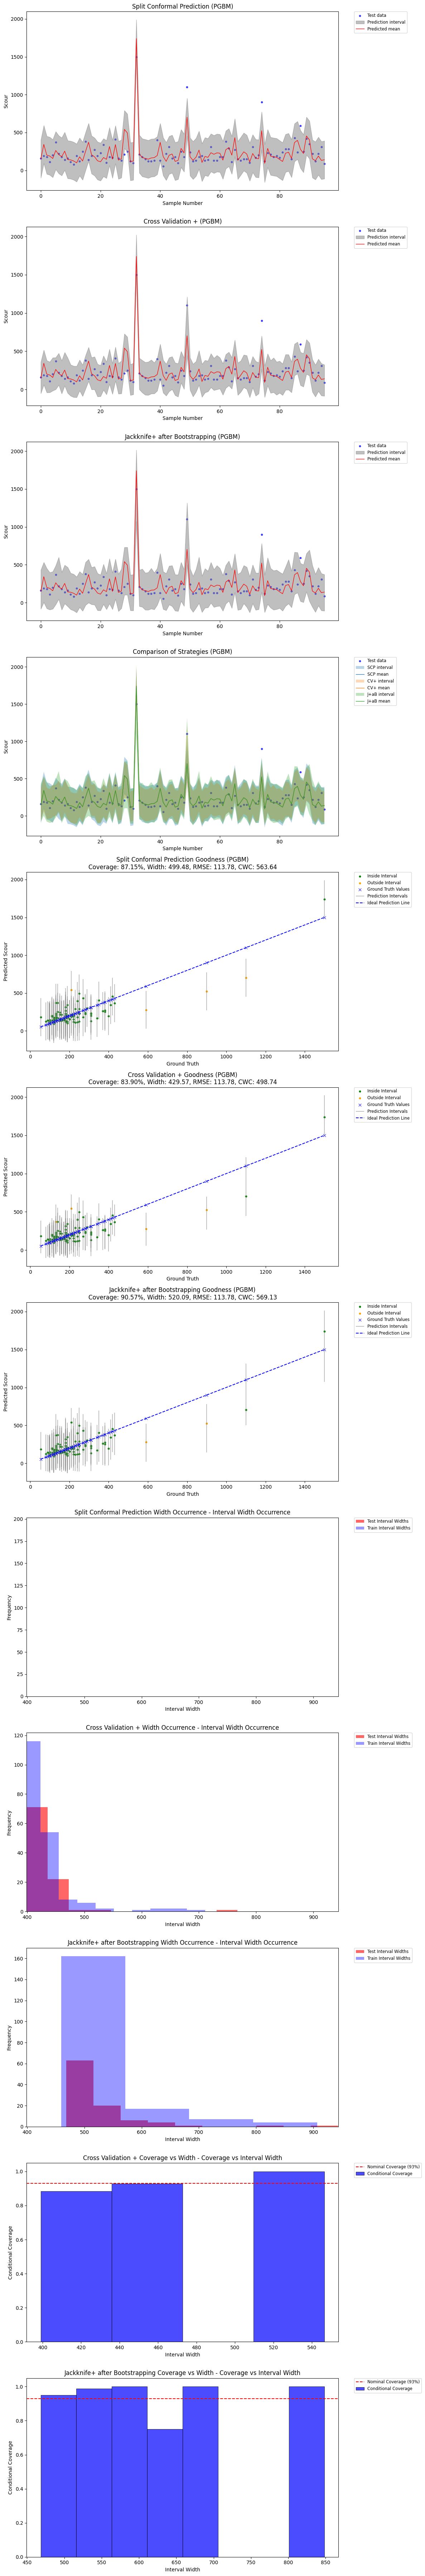

In [42]:
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred): # Corrected: Removed y_test argument as it's not defined and not used
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}

    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_test[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) & (y_test[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan) # or handle empty bins as needed
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages


class visualize:
    @staticmethod
    def coverage(int_pred, y_test):
        return {strat_name: np.mean((y_test >= int_pred[strat_name][:, 0]) & (y_test.to_numpy() <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        return {strat_name: np.sqrt(mean_squared_error(y_test, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = visualize.width(int_pred)
        coverages = visualize.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        n_samples = len(y_true)
        y_true_np = y_true.ravel() # Ensure y_true is numpy array and flattened

        # Determine points inside and outside the interval
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval

        # Plot points inside the interval in green
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        # Plot points outside the interval in orange
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')

        # Plot all ground truth values as blue crosses
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')


        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], linestyle='--', color='blue', label='Ideal Prediction Line') # Changed label for clarity
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()

        # Calculate interval widths for test and train sets
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])

        # Plot histograms for both train and test widths
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')


        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()

        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]

        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')

        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax



def conformal_predictions_MAPIE_PGBM(
    model_class,
    best_params,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    excel_file_path
):
    SEED = 123
    np.random.seed(SEED)
    MISCOVERAGE = 0.07
    warnings.filterwarnings("ignore")
    os.makedirs('output/regression', exist_ok=True)

    # Convert y_test to a NumPy array if it has to_numpy
    y_test_np = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else y_test

    # Map method names to descriptive labels
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }

    # Corresponding parameters for each strategy
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 10},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    # Create a base estimator object for each strategy
    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }

    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {} # Store train predictions and intervals
    # Fit & predict using MapieRegressor for each strategy
    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(X_train, y_train)
        y_pred[strat_name], int_pred[strat_name] = mapie.predict(X_test, alpha=MISCOVERAGE)
        y_pred_train[strat_name], int_pred_train[strat_name] = mapie.predict(X_train, alpha=MISCOVERAGE) # Predict on train set


    # Calculate metrics
    coverages: dict = validate.coverage(int_pred, y_test)
    widths: dict = validate.width(int_pred)
    rmse_vals: dict = validate.rmse(y_pred, y_test)
    cwc_vals: dict = validate.cwc(int_pred, y_test, MISCOVERAGE)


    # Print metrics and prepare for plotting
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            # Calculate RMSE (already calculated in validate.rmse, using rmse_vals now)
            rmse = rmse_vals[strat_name]

            # Calculate interval width (already calculated in validate.width, using widths now)
            interval_width = widths[strat_name]

            # Calculate coverage (already calculated in validate.coverage, using coverages now)
            coverage = coverages[strat_name]

            # Calculate CWC (already calculated in validate.cwc, using cwc_vals now)
            cwc = cwc_vals[strat_name]

            # Calculate SSC (Symmetric Scoring Criterion)
            ssc = np.mean((y_test - y_pred[strat_name])**2 + (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)

            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}")
            print()

    # Plot the intervals and predictions for each strategy
    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS: int = 10
    n_figs: int = len(strategies_names)*3 + 1 + len(_strategies)
    fig, axs = plt.subplots(nrows=n_figs, figsize=(12, 6 * n_figs))
    plot_index = 0

    # Individual strategy plots (original plots)
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            # Predicted intervals
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()

            # Visualize
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                            color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red',
                                    label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('Scour')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Comparison subplot (moved after individual strategy plots)
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, y_test_np, label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up,
                                        alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name],
                                label=f'{strat_name} mean', linewidth=1)

    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('Scour')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1


    # Goodness plots
    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()

            axs[plot_index] = visualize.goodness(
                y_test, y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})', # Removed subsample
            )
            axs[plot_index].set_ylabel('Predicted Scour')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])

    for _i, strat_name in enumerate(strategies_names.keys()):
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages: dict = validate.cond_coverage(int_pred, y_test, num_bins=NUM_BINS)
    for _i, _strat in enumerate(_strategies):
        axs[plot_index] = visualize.coverage_by_width(
            y_test, int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1


    fig.tight_layout()

    # Save plots to Excel
    # Save plots to Excel
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        img = Image(PImage.open(buf)) # Use PIL to open from BytesIO

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        sheet_name = 'conformal_predictions_MAPIE'
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        #NEW: Save all predictions/intervals to one worksheet
        all_rows = []
        # Always use y_test_np for consistent array-ness
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = ((y_test_np >= ymin_np) & (y_test_np <= ymax_np)).astype(int)
            residual_np = y_test_np - y_pred_np

            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_test_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np,
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)

        all_pred_sheet_name = 'all_pred_values'
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1

        worksheet2 = workbook.create_sheet(title=all_pred_sheet_name)

        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet2.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet2.cell(row=i+2, column=j, value=float(value) if isinstance(value, np.generic) else value)

        # Save the workbook
        workbook.save(excel_file_path)



# Example call (assuming best_params, X_train, y_train, X_test, y_test are defined elsewhere)
conformal_predictions_MAPIE_PGBM(
    model_class=PGBMWrapper,
    best_params=best_params,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    model_name="PGBM",
    excel_file_path="./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/PGBM.xlsx"
)

In [43]:
def conformal_predictions_PUNCC_PGBM(
    X_train,
    y_train,
    X_test,
    y_test,
    best_scores_autosampler,
    model_class,
    excel_file_path=None,
    model_params=None,
    alpha=0.1
):
    if model_params is None:
        if model_class.__name__ == 'PGBMWrapper':
            model_params = get_best_model_params(best_scores_autosampler, 'PGBM')
        else:
            model_params = {}

    # Initialize model
    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing model {model_class.__name__}: {e}")
        return

    # Convert to NumPy arrays if needed
    y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
    model.fit(X_train, y_train_np)

    y_test_np = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

    def evaluate_cp(X_test_eval, y_test_eval, model_cp, alpha_val):
        X_test_np = X_test_eval.to_numpy() if isinstance(X_test_eval, pd.DataFrame) else np.array(X_test_eval)
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_test_np, alpha=alpha_val)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(y_test_eval, y_pred_lower, y_pred_upper)
        picp = np.mean((y_test_eval >= y_pred_lower) & (y_test_eval <= y_pred_upper))
        return y_pred, y_pred_lower, y_pred_upper, sharpness, coverage, picp

    # Base predictor setup
    base_predictor = BasePredictor(model, is_trained=True)

    # SplitCP
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train_np, fit_ratio=0.5)

    y_pred_sc, y_lower_sc, y_upper_sc, sharpness_sc, coverage_sc, picp_sc = evaluate_cp(X_test, y_test_np, splitcp, alpha)

    # CVPlus
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train_np)
    y_pred, y_lower_cv, y_upper_cv, sharpness_cv, coverage_cv, picp_cv = evaluate_cp(X_test, y_test_np, cvplus, alpha)

    # CQR
    X_fit, X_calib, y_fit, y_calib = train_test_split(X_train, y_train_np, test_size=0.5, random_state=0)
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)
    upper_quantile_model.fit(X_fit, y_fit)
    lower_quantile_model.fit(X_fit, y_fit)
    dualpredictor = DualPredictor([lower_quantile_model, upper_quantile_model], is_trained=[True, True])
    cqr = CQR(dualpredictor, train=False)
    cqr.fit(X_calib=X_calib, y_calib=y_calib)
    y_pred_cqr, y_lower_cqr, y_upper_cqr, sharpness_cqr, coverage_cqr, picp_cqr = evaluate_cp(X_test, y_test_np, cqr, alpha)
    y_pred_cqr = 0.5 * (y_lower_cqr + y_upper_cqr)
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness_sc:.3f}")
    print(f"SplitCP - Average coverage: {coverage_sc*100:.3f}%")
    print(f"SplitCP - PICP: {picp_sc*100:.3f}%\n")
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cv:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cv*100:.3f}%")
    print(f"CVPlus - PICP: {picp_cv*100:.3f}%\n")
    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")
    print(f"CQR - PICP: {picp_cqr*100:.3f}%\n")

    # Plotting
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    sample_indices = np.arange(len(y_test_np))

    # Plot results for each method
    for idx, (y_pred, y_lower, y_upper, title) in enumerate([
        (y_pred_sc, y_lower_sc, y_upper_sc, 'SplitCP'),
        (y_pred_sc, y_lower_cv, y_upper_cv, 'CVPlus'),
        (y_pred_cqr, y_lower_cqr, y_upper_cqr, 'CQR')
    ]):
        axs[idx].scatter(sample_indices, y_test_np, label='True', color='blue', s=10, alpha=0.7)
        axs[idx].fill_between(sample_indices, y_lower, y_upper, color='gray', alpha=0.5, label='Prediction interval')
        axs[idx].plot(sample_indices, y_pred, color='red', label='Predicted mean', linewidth=1)
        axs[idx].set_title(f'{title}: Prediction Intervals with Conformal Prediction')
        axs[idx].set_xlabel('Sample Number')
        axs[idx].set_ylabel('Scour')
        axs[idx].legend(fontsize='small')

    plt.tight_layout()

    # --- Collect values for export, grouped by method ---
    results_dict = {
        'SplitCP_true': np.asarray(y_test).reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_sc).reshape(-1),
        'SplitCP_lower': np.asarray(y_lower_sc).reshape(-1),
        'SplitCP_upper': np.asarray(y_upper_sc).reshape(-1),

        'CVPlus_true': np.asarray(y_test).reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_sc).reshape(-1),
        'CVPlus_lower': np.asarray(y_lower_cv).reshape(-1),
        'CVPlus_upper': np.asarray(y_upper_cv).reshape(-1),

        'CQR_true': np.asarray(y_test).reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_upper_cqr).reshape(-1),
    }

    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_values')

    plt.close(fig)

def save_plot_to_excel(fig, excel_file_path, sheet_name):
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(buf)

        # Load the workbook and add a new sheet
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            base_name = sheet_name
            i = 1
            while sheet_name in workbook.sheetnames:
                sheet_name = f"{base_name}_{i}"
                i += 1
        worksheet = workbook.create_sheet(title=sheet_name)

        # Add the image to the worksheet
        worksheet.add_image(img, 'A1')

        # Save the workbook
        workbook.save(excel_file_path)

def save_values_to_excel(results_dict, excel_file_path, sheet_name):
    # Convert the dictionary to a DataFrame (columns will be in the order of insertion)
    df = pd.DataFrame(results_dict)
    # Load the workbook
    workbook = load_workbook(excel_file_path)
    # Ensure unique sheet name
    base_name = sheet_name
    i = 1
    while sheet_name in workbook.sheetnames:
        sheet_name = f"{base_name}_{i}"
        i += 1
    # Write DataFrame to a new sheet
    worksheet = workbook.create_sheet(title=sheet_name)
    for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
        for c_idx, value in enumerate(row, 1):
            worksheet.cell(row=r_idx, column=c_idx, value=value)
    # Save the workbook
    workbook.save(excel_file_path)

# Example usage (assuming X_train, y_train, X_test, y_test, best_scores_autosampler exist):
conformal_predictions_PUNCC_PGBM(
    X_train, y_train,
    X_test, y_test,
    best_scores_autosampler=best_scores_autosampler,
    model_class=PGBMWrapper,
    excel_file_path="./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/PGBM.xlsx",
    alpha=0.1
)


Training on CPU
Estimator 0/300, Train metric: 282.0879
Estimator 1/300, Train metric: 279.8289
Estimator 2/300, Train metric: 278.2864
Estimator 3/300, Train metric: 277.0394
Estimator 4/300, Train metric: 274.9732
Estimator 5/300, Train metric: 272.6784
Estimator 6/300, Train metric: 270.7197
Estimator 7/300, Train metric: 268.3668
Estimator 8/300, Train metric: 266.7731
Estimator 9/300, Train metric: 264.7304
Estimator 10/300, Train metric: 262.5108
Estimator 11/300, Train metric: 260.6197
Estimator 12/300, Train metric: 258.7881
Estimator 13/300, Train metric: 257.4232
Estimator 14/300, Train metric: 255.1190
Estimator 15/300, Train metric: 253.2872
Estimator 16/300, Train metric: 251.2900
Estimator 17/300, Train metric: 249.3364
Estimator 18/300, Train metric: 247.2919
Estimator 19/300, Train metric: 246.4284
Estimator 20/300, Train metric: 244.3657
Estimator 21/300, Train metric: 242.5655
Estimator 22/300, Train metric: 241.4949
Estimator 23/300, Train metric: 239.6941
Estimator 

In [44]:
best_params = get_best_model_params(best_scores_autosampler, 'PGBM')
prediction_MAPIE_analysis(X_train, y_train, X_test, y_test, PGBMWrapper, best_params,"./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/PGBM.xlsx", "PGBM Prediction Intervals")

Training on CPU
Estimator 0/100, Train metric: 261.9440
Estimator 1/100, Train metric: 241.3661
Estimator 2/100, Train metric: 222.5815
Estimator 3/100, Train metric: 205.7301
Estimator 4/100, Train metric: 190.1220
Estimator 5/100, Train metric: 176.1874
Estimator 6/100, Train metric: 163.6357
Estimator 7/100, Train metric: 151.9371
Estimator 8/100, Train metric: 141.3446
Estimator 9/100, Train metric: 131.9124
Estimator 10/100, Train metric: 123.3259
Estimator 11/100, Train metric: 115.3166
Estimator 12/100, Train metric: 108.2696
Estimator 13/100, Train metric: 101.5347
Estimator 14/100, Train metric: 95.4457
Estimator 15/100, Train metric: 90.0002
Estimator 16/100, Train metric: 84.8449
Estimator 17/100, Train metric: 80.1774
Estimator 18/100, Train metric: 76.0493
Estimator 19/100, Train metric: 71.9888
Estimator 20/100, Train metric: 68.5882
Estimator 21/100, Train metric: 65.4245
Estimator 22/100, Train metric: 62.4683
Estimator 23/100, Train metric: 59.8020
Estimator 24/100, Tr

# **Conformal Predictions with TabNet**

In [45]:
best_params = get_best_model_params(best_scores_autosampler, 'TabNet')
print(best_params)

{'n_d': 16, 'n_a': 64, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 0.01, 'optimizer_params': {'lr': 0.02}, 'mask_type': 'sparsemax', 'n_shared': 2, 'n_independent': 1, 'scheduler_params': {'step_size': 10, 'gamma': 0.9}, 'scheduler_fn': <class 'torch.optim.lr_scheduler.StepLR'>, 'seed': 42, 'verbose': 0}


In [46]:
from pytorch_tabnet import TabNetRegressor
class TabNetRegressorForMapie(TabNetRegressor):
    def fit(self, X, y, *args, **kwargs):
        y_ = np.array(y)
        if y_.ndim == 1:
            y_ = y_.reshape(-1, 1)
        return super().fit(X, y_, *args, **kwargs)
    def predict(self, X, *args, **kwargs):
        preds = super().predict(X, *args, **kwargs)
        return preds.flatten()
class validate:
    @staticmethod
    def coverage(int_pred, y_test):
        y_arr = np.array(y_test)
        return {strat_name: np.mean((y_arr >= int_pred[strat_name][:, 0]) & (y_arr <= int_pred[strat_name][:, 1])) for strat_name in int_pred}
    @staticmethod
    def width(int_pred):
        return {strat_name: np.mean(int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]) for strat_name in int_pred}
    @staticmethod
    def rmse(y_pred, y_test):
        y_arr = np.array(y_test)
        return {strat_name: np.sqrt(mean_squared_error(y_arr, y_pred[strat_name])) for strat_name in y_pred}
    @staticmethod
    def cwc(int_pred, y_test, miscoverage):
        widths = validate.width(int_pred)
        coverages = validate.coverage(int_pred, y_test)
        return {strat_name: widths[strat_name] * (1 + (coverages[strat_name] < (1 - miscoverage)) * (1 - coverages[strat_name])) for strat_name in int_pred}
    @staticmethod
    def cond_coverage(int_pred, y_test, num_bins=10):
        y_arr = np.array(y_test)
        cond_coverages = {}
        for strat_name in int_pred:
            widths = int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0]
            bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
            digitized_widths = np.digitize(widths, bin_edges)
            strategy_cond_coverage = []
            for bin_num in range(1, num_bins + 1):
                indices_in_bin = np.where(digitized_widths == bin_num)[0]
                if len(indices_in_bin) > 0:
                    bin_coverage = np.mean((y_arr[indices_in_bin] >= int_pred[strat_name][indices_in_bin, 0]) &
                                           (y_arr[indices_in_bin] <= int_pred[strat_name][indices_in_bin, 1]))
                    strategy_cond_coverage.append(bin_coverage)
                else:
                    strategy_cond_coverage.append(np.nan)
            cond_coverages[strat_name] = strategy_cond_coverage
        return cond_coverages
class visualize:
    @staticmethod
    def goodness(y_true, y_pred, y_pred_low, y_pred_up, coverage, width, rmse, cwc, ax=None, title="Goodness Plot"):
        if ax is None:
            fig, ax = plt.subplots()
        y_true_np = np.array(y_true).ravel()
        inside_interval = (y_true_np >= y_pred_low) & (y_true_np <= y_pred_up)
        outside_interval = ~inside_interval
        ax.scatter(y_true_np[inside_interval], y_pred[inside_interval], color='green', s=10, label='Inside Interval')
        ax.scatter(y_true_np[outside_interval], y_pred[outside_interval], color='orange', s=10, label='Outside Interval')
        ax.scatter(y_true_np, y_true_np, color='blue', marker='x', s=30, linewidths=0.7, label='Ground Truth Values')
        ax.vlines(y_true_np, y_pred_low, y_pred_up, color='gray', alpha=0.5, label='Prediction Intervals')
        ax.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)],
                 linestyle='--', color='blue', label='Ideal Prediction Line')
        ax.set_xlabel('Ground Truth')
        ax.set_ylabel('Predictions')
        ax.set_title(f'{title}\nCoverage: {coverage*100:.2f}%, Width: {width:.2f}, RMSE: {rmse:.2f}, CWC: {cwc:.2f}')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def width_size_occurrence(int_pred, train_intervals, num_bins=10, ax=None, x_lim=None, title="Width Size Occurrence"):
        if ax is None:
            fig, ax = plt.subplots()
        widths_test = np.abs(int_pred[:, 1] - int_pred[:, 0])
        widths_train = np.abs(train_intervals[:, 1] - train_intervals[:, 0])
        ax.hist(widths_test, bins=num_bins, alpha=0.6, label='Test Interval Widths', color='red')
        ax.hist(widths_train, bins=num_bins, alpha=0.4, label='Train Interval Widths', color='blue')
        if x_lim is not None:
            ax.set_xlim(x_lim)
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Occurrence (Frequency)')
        ax.set_title(f'{title} - Interval Width Occurrence')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

    @staticmethod
    def coverage_by_width(y_test, int_pred, miscoverage, cond_coverages, num_bins=10, ax=None, title="Coverage vs Width"):
        if ax is None:
            fig, ax = plt.subplots()
        widths = int_pred[:, 1] - int_pred[:, 0]
        bin_edges = np.histogram_bin_edges(widths, bins=num_bins)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        bin_width = bin_edges[1] - bin_edges[0]
        ax.bar(bin_centers, cond_coverages, width=bin_width, color='blue', alpha=0.7, edgecolor='black', linewidth=0.8, label='Conditional Coverage')
        ax.axhline(1 - miscoverage, color='red', linestyle='--', label=f'Nominal Coverage ({(1 - miscoverage)*100:.0f}%)')
        ax.set_xlabel('Interval Width')
        ax.set_ylabel('Conditional Coverage')
        ax.set_title(f'{title} - Coverage vs Interval Width')
        ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        return ax

def conformal_predictions_MAPIE_tabnet(
    model_class, best_params, X_train, y_train, X_test, y_test, model_name, excel_file_path
):
    is_tabnet = ("TabNet" in model_name or "TabNet" in model_class.__name__)

    # Remove 'verbose' if present to avoid TypeError in TabNet
    if isinstance(best_params, dict) and "verbose" in best_params:
        best_params = dict(best_params) # make a copy!
        best_params.pop("verbose", None)

    # Set random seed for reproducibility
    SEED: int = 123
    np.random.seed(SEED)

    MISCOVERAGE = 0.1
    warnings.filterwarnings("ignore")
    os.makedirs('output/regression', exist_ok=True)
    strategies_names = {
        'SCP': 'Split Conformal Prediction',
        'CV+': 'Cross Validation +',
        'J+aB': 'Jackknife+ after Bootstrapping',
    }
    strategies_params = {
        'SCP': {'method': 'base', 'cv': KFold(n_splits=5)},
        'CV+': {'method': "plus", 'cv': 5},
        'J+aB': {'method': "minmax", 'cv': Subsample(n_resamplings=50)},
    }

    base_estimators = {
        strat_name: model_class(**best_params) for strat_name in strategies_names
    }
    y_pred, int_pred = {}, {}
    y_pred_train, int_pred_train = {}, {}

    for strat_name, base_estimator in base_estimators.items():
        mapie = MapieRegressor(base_estimator, **strategies_params[strat_name])
        mapie.fit(np.array(X_train), np.array(y_train))
        y_pred_raw, int_pred_raw = mapie.predict(np.array(X_test), alpha=MISCOVERAGE)
        y_pred[strat_name] = y_pred_raw.flatten()
        int_pred[strat_name] = np.array(int_pred_raw)
        y_pred_train_raw, int_pred_train_raw = mapie.predict(np.array(X_train), alpha=MISCOVERAGE)
        y_pred_train[strat_name] = y_pred_train_raw.flatten()
        int_pred_train[strat_name] = np.array(int_pred_train_raw)

    # All metric calls now use np.array(y_test)
    coverages = validate.coverage(int_pred, np.array(y_test))
    widths = validate.width(int_pred)
    rmse_vals = validate.rmse(y_pred, np.array(y_test))
    cwc_vals = validate.cwc(int_pred, np.array(y_test), MISCOVERAGE)

    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            rmse = rmse_vals[strat_name]
            interval_width = widths[strat_name]
            coverage = coverages[strat_name]
            cwc = cwc_vals[strat_name]
            ssc = np.mean((np.array(y_test) - y_pred[strat_name])**2 +
                          (int_pred[strat_name][:, 1] - int_pred[strat_name][:, 0])**2)
            print(f"Strategy: {strategies_names[strat_name]}")
            print(f"  RMSE: {rmse:.4f}")
            print(f"  Interval Width: {interval_width:.4f}")
            print(f"  Coverage: {coverage * 100:.2f}%")
            print(f"  CWC: {cwc:.4f}")
            print(f"  SSC: {ssc:.4f}\n")

    _strategies = [_s for _s in strategies_names.keys() if _s != 'SCP']
    NUM_BINS = 10
    n_figs = len(strategies_names) * 3 + 1 + len(_strategies)
    fig, axs = plt.subplots(nrows=n_figs, figsize=(10, 5 * n_figs))
    plot_index = 0

    # Individual strategy plots
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            _y_pred_low = int_pred[strat_name][:, 0].ravel()
            _y_pred_up = int_pred[strat_name][:, 1].ravel()
            sample_indices = np.arange(len(X_test))
            axs[plot_index].scatter(sample_indices, np.array(y_test), label='Test data', color='blue', s=10, alpha=0.7)
            axs[plot_index].fill_between(sample_indices, _y_pred_low, _y_pred_up, color='gray', alpha=0.5, label='Prediction interval')
            axs[plot_index].plot(sample_indices, y_pred[strat_name], color='red', label='Predicted mean', linewidth=1)
            axs[plot_index].set_title(f'{strategies_names[strat_name]} ({model_name})')
            axs[plot_index].set_xlabel('Sample Number')
            axs[plot_index].set_ylabel('Scour')
            axs[plot_index].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
            plot_index += 1

    # Combined plot
    comparison_ax = axs[plot_index]
    sample_indices = np.arange(len(X_test))
    comparison_ax.scatter(sample_indices, np.array(y_test), label='Test data', color='blue', s=10, alpha=0.7)
    for strat_name in y_pred:
        _y_pred_low = int_pred[strat_name][:, 0].ravel()
        _y_pred_up = int_pred[strat_name][:, 1].ravel()
        comparison_ax.fill_between(sample_indices, _y_pred_low, _y_pred_up, alpha=0.3, label=f'{strat_name} interval')
        comparison_ax.plot(sample_indices, y_pred[strat_name], label=f'{strat_name} mean', linewidth=1)
    comparison_ax.set_title(f'Comparison of Strategies ({model_name})')
    comparison_ax.set_xlabel('Sample Number')
    comparison_ax.set_ylabel('Scour')
    comparison_ax.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plot_index += 1

    # Goodness plots
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            _y_pred_low_goodness = int_pred[strat_name][:, 0].ravel()
            _y_pred_up_goodness = int_pred[strat_name][:, 1].ravel()
            axs[plot_index] = visualize.goodness(
                np.array(y_test), y_pred[strat_name],
                _y_pred_low_goodness,
                _y_pred_up_goodness,
                coverages[strat_name],
                widths[strat_name],
                rmse_vals[strat_name],
                cwc_vals[strat_name],
                ax=axs[plot_index],
                title=f'{strategies_names[strat_name]} Goodness ({model_name})',
            )
            axs[plot_index].set_ylabel('Predicted Scour')
            plot_index += 1

    # Width Occurrence plots
    _x_max = (1+1e-3) * np.max([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    _x_min = np.min([np.abs(int_pred[strat_name][:, 0] - int_pred[strat_name][:, 1]) for strat_name in strategies_names.keys() if strat_name in int_pred])
    for strat_name in strategies_names.keys():
        if strat_name in y_pred:
            axs[plot_index] = visualize.width_size_occurrence(
                int_pred[strat_name],
                train_intervals=int_pred_train[strat_name],
                num_bins=10,
                ax=axs[plot_index],
                x_lim=[_x_min, _x_max],
                title=f'{strategies_names[strat_name]} Width Occurrence',
            )
            axs[plot_index].set_ylabel('Frequency')
            plot_index += 1

    # Coverage vs Width plots
    cond_coverages = validate.cond_coverage(int_pred, np.array(y_test), num_bins=NUM_BINS)
    for _strat in _strategies:
        axs[plot_index] = visualize.coverage_by_width(
            np.array(y_test), int_pred[_strat], MISCOVERAGE,
            cond_coverages[_strat],
            num_bins=NUM_BINS,
            ax=axs[plot_index],
            title=f'{strategies_names[_strat]} Coverage vs Width',
        )
        plot_index += 1

    plt.tight_layout()

    # Save plots and tabular data to Excel
    with io.BytesIO() as buf:
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PImage.open(buf))
        workbook = load_workbook(excel_file_path)
        plot_sheet_name = f'conformal_predictions_MAPIE_{model_name}'
        if plot_sheet_name in workbook.sheetnames:
            plot_sheet_name += '_new'
        plot_worksheet = workbook.create_sheet(title=plot_sheet_name)
        plot_worksheet.add_image(img, 'A1')

        # Tabular export
        all_rows = []
        y_true_np = np.array(y_test).ravel()
        for strat_name in y_pred:
            y_pred_np = y_pred[strat_name].ravel()
            ymin_np = int_pred[strat_name][:, 0].ravel()
            ymax_np = int_pred[strat_name][:, 1].ravel()
            width_np = ymax_np - ymin_np
            is_covered_np = (y_true_np >= ymin_np) & (y_true_np <= ymax_np)
            residual_np = y_true_np - y_pred_np
            strat_df = pd.DataFrame({
                'sample_index': np.arange(len(y_pred_np)),
                'strategy': strat_name,
                'y_true': y_true_np,
                'y_pred': y_pred_np,
                'ymin': ymin_np,
                'ymax': ymax_np,
                'width': width_np,
                'is_covered': is_covered_np.astype(int),
                'residual': residual_np
            })
            all_rows.append(strat_df)
        all_export_df = pd.concat(all_rows, axis=0, ignore_index=True)
        all_pred_sheet_name = 'all_pred_values_' + model_name
        base_name = all_pred_sheet_name
        idx = 1
        while all_pred_sheet_name in workbook.sheetnames:
            all_pred_sheet_name = f'{base_name}_new{idx}'
            idx += 1
        worksheet = workbook.create_sheet(title=all_pred_sheet_name)
        for j, col_name in enumerate(all_export_df.columns, 1):
            worksheet.cell(row=1, column=j, value=col_name)
        for i, row in all_export_df.iterrows():
            for j, value in enumerate(row, 1):
                worksheet.cell(row=i+2, column=j, value=value)
        workbook.save(excel_file_path)

    plt.close()


conformal_predictions_MAPIE_tabnet(
    TabNetRegressorForMapie,        # <------ use the wrapper here!
    best_params,
    X_train,
    y_train,
    X_test,
    y_test,
    "TabNet",
    "./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/TabNet.xlsx"
)

Streaming output truncated to the last 5000 lines.
epoch 21 | loss: 123827.92969|  0:00:01s
epoch 22 | loss: 122243.07031|  0:00:01s
epoch 23 | loss: 120316.82031|  0:00:01s
epoch 24 | loss: 118476.09375|  0:00:01s
epoch 25 | loss: 116230.34375|  0:00:01s
epoch 26 | loss: 114112.77344|  0:00:02s
epoch 27 | loss: 111726.39844|  0:00:02s
epoch 28 | loss: 108762.35156|  0:00:02s
epoch 29 | loss: 106363.36719|  0:00:02s
epoch 30 | loss: 104082.625|  0:00:02s
epoch 31 | loss: 102090.21094|  0:00:02s
epoch 32 | loss: 99454.94531|  0:00:02s
epoch 33 | loss: 96830.0625|  0:00:02s
epoch 34 | loss: 93720.03906|  0:00:02s
epoch 35 | loss: 90931.78906|  0:00:02s
epoch 36 | loss: 88281.53906|  0:00:03s
epoch 37 | loss: 84884.83594|  0:00:03s
epoch 38 | loss: 83191.22656|  0:00:03s
epoch 39 | loss: 80534.36719|  0:00:03s
epoch 40 | loss: 76467.24219|  0:00:03s
epoch 41 | loss: 73351.42969|  0:00:03s
epoch 42 | loss: 70140.83594|  0:00:03s
epoch 43 | loss: 67245.63281|  0:00:03s
epoch 44 | loss: 6417

In [47]:
class TabNetRegressorForPUNCC(TabNetRegressor):
    def fit(self, X, y, *args, **kwargs):
        y_ = np.array(y)
        if y_.ndim == 1:
            y_ = y_.reshape(-1, 1)
        return super().fit(X, y_, *args, **kwargs)
    def predict(self, X, *args, **kwargs):
        preds = super().predict(X, *args, **kwargs)
        return preds.flatten()

def conformal_predictions_PUNCC_tabnet(
    X_train, y_train, X_test, y_test, best_scores_autosampler,
    excel_file_path=None, model_params=None, alpha=0.1
):
    # Get best parameters if not supplied
    if model_params is None:
        model_params = get_best_model_params(best_scores_autosampler, 'TabNet')
        if "verbose" in model_params:
            model_params = dict(model_params)
            model_params.pop("verbose", None)

    model_class = TabNetRegressorForPUNCC

    try:
        model = model_class(**model_params)
    except TypeError as e:
        print(f"Error initializing TabNet: {e}")
        return

    model.fit(X_train, y_train)

    def evaluate_cp(X_te, y_te, model_cp, alpha):
        y_pred, y_pred_lower, y_pred_upper = model_cp.predict(X_te, alpha=alpha)
        sharpness = regression_sharpness(y_pred_lower, y_pred_upper)
        coverage = regression_mean_coverage(np.array(y_te), y_pred_lower, y_pred_upper)
        return sharpness, coverage

    # Base predictor
    base_predictor = BasePredictor(model, is_trained=True)

    # SplitCP
    splitcp = SplitCP(base_predictor, train=True, random_state=0)
    splitcp.fit(X=X_train, y=y_train, fit_ratio=0.5)
    y_pred_splitcp, y_pred_lower_splitcp, y_pred_upper_splitcp = splitcp.predict(X_test, alpha=alpha)
    sharpness, coverage = evaluate_cp(X_test, y_test, splitcp, alpha)
    picp_splitcp = np.mean((np.array(y_test).ravel() >= y_pred_lower_splitcp) &
                           (np.array(y_test).ravel() <= y_pred_upper_splitcp))
    print(f"SplitCP - Average prediction intervals width (sharpness): {sharpness:.3f}")
    print(f"SplitCP - Average coverage: {coverage*100:.3f}%")
    print(f"SplitCP - PICP: {picp_splitcp*100:.3f}%")

    # CVPlus
    cvplus = CVPlus(base_predictor, K=5, random_state=0)
    cvplus.fit(X=X_train, y=y_train)
    y_pred_cvplus, y_pred_lower_cvplus, y_pred_upper_cvplus = cvplus.predict(X_test, alpha=alpha)
    sharpness_cvplus, coverage_cvplus = evaluate_cp(X_test, y_test, cvplus, alpha)
    picp_cvplus = np.mean((np.array(y_test).ravel() >= y_pred_lower_cvplus) &
                          (np.array(y_test).ravel() <= y_pred_upper_cvplus))
    print(f"CVPlus - Average prediction intervals width (sharpness): {sharpness_cvplus:.3f}")
    print(f"CVPlus - Average coverage: {coverage_cvplus*100:.3f}%")
    print(f"CVPlus - PICP: {picp_cvplus*100:.3f}%\n")

    # CQR
    from sklearn.model_selection import train_test_split
    X_fit, X_calib, y_fit, y_calib = train_test_split(X_train, y_train, test_size=0.5, random_state=0)
    upper_quantile_model = model_class(**model_params)
    lower_quantile_model = model_class(**model_params)
    upper_quantile_model.fit(X_fit, y_fit)
    lower_quantile_model.fit(X_fit, y_fit)
    dualpredictor = DualPredictor([lower_quantile_model, upper_quantile_model], is_trained=[True, True])
    cqr = CQR(dualpredictor, train=False)
    cqr.fit(X_calib=X_calib, y_calib=y_calib)
    y_pred_cqr, y_pred_lower_cqr, y_pred_upper_cqr = cqr.predict(X_test, alpha=alpha)
    y_pred_cqr = 0.5 * (y_pred_lower_cqr + y_pred_upper_cqr)
    sharpness_cqr, coverage_cqr = evaluate_cp(X_test, y_test, cqr, alpha)
    picp_cqr = np.mean((np.array(y_test).ravel() >= y_pred_lower_cqr) &
                       (np.array(y_test).ravel() <= y_pred_upper_cqr))
    print(f"CQR - Average prediction intervals width (sharpness): {sharpness_cqr:.3f}")
    print(f"CQR - Average coverage: {coverage_cqr*100:.3f}%")
    print(f"CQR - PICP: {picp_cqr*100:.3f}%\n")

    # Plot
    fig, axs = plt.subplots(3, 1, figsize=(10, 18))
    arr_y_test = np.array(y_test).ravel()
    axs[0].scatter(np.arange(len(arr_y_test)), arr_y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[0].fill_between(np.arange(len(arr_y_test)), y_pred_lower_splitcp, y_pred_upper_splitcp, color='gray', alpha=0.5, label='Prediction interval')
    axs[0].plot(np.arange(len(arr_y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[0].set_title('Split Conformal Prediction')
    axs[0].set_xlabel('Sample Number')
    axs[0].set_ylabel('Scour')
    axs[0].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    axs[1].scatter(np.arange(len(arr_y_test)), arr_y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[1].fill_between(np.arange(len(arr_y_test)), y_pred_lower_cvplus, y_pred_upper_cvplus, color='gray', alpha=0.5, label='Prediction interval')
    axs[1].plot(np.arange(len(arr_y_test)), y_pred_splitcp, color='red', label='Predicted mean', linewidth=1)
    axs[1].set_title('Cross Validation Plus')
    axs[1].set_xlabel('Sample Number ')
    axs[1].set_ylabel('Scour')
    axs[1].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    axs[2].scatter(np.arange(len(arr_y_test)), arr_y_test, label='True', color='blue', s=10, alpha=0.7)
    axs[2].fill_between(np.arange(len(arr_y_test)), y_pred_lower_cqr, y_pred_upper_cqr, color='gray', alpha=0.5, label='Prediction interval')
    axs[2].plot(np.arange(len(arr_y_test)), y_pred_cqr, color='red', label='Predicted mean', linewidth=1)
    axs[2].set_title('Conformalized Quantile Regression')
    axs[2].set_xlabel('Sample Number')
    axs[2].set_ylabel('Scour')
    axs[2].legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()

    # --- Collect values for export ---
    results_dict = {
        'SplitCP_true': arr_y_test.reshape(-1),
        'SplitCP_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'SplitCP_lower': np.asarray(y_pred_lower_splitcp).reshape(-1),
        'SplitCP_upper': np.asarray(y_pred_upper_splitcp).reshape(-1),

        'CVPlus_true': arr_y_test.reshape(-1),
        'CVPlus_pred': np.asarray(y_pred_splitcp).reshape(-1),
        'CVPlus_lower': np.asarray(y_pred_lower_cvplus).reshape(-1),
        'CVPlus_upper': np.asarray(y_pred_upper_cvplus).reshape(-1),

        'CQR_true': arr_y_test.reshape(-1),
        'CQR_pred': np.asarray(y_pred_cqr).reshape(-1),
        'CQR_lower': np.asarray(y_pred_lower_cqr).reshape(-1),
        'CQR_upper': np.asarray(y_pred_upper_cqr).reshape(-1),
    }

    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'conformal_predictions_PUNCC_TabNet')
        save_values_to_excel(results_dict, excel_file_path, 'conformal_predictions_PUNCC_TabNet_values')

    plt.close(fig)


conformal_predictions_PUNCC_tabnet(
    X_train, y_train, X_test, y_test, best_scores_autosampler,
    excel_file_path="./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/TabNet.xlsx",
    model_params=best_params  # your best params for TabNet
)

SplitCP - Average prediction intervals width (sharpness): 505.330
SplitCP - Average coverage: 87.500%
SplitCP - PICP: 87.500%
CVPlus - Average prediction intervals width (sharpness): 471.750
CVPlus - Average coverage: 96.875%
CVPlus - PICP: 96.875%

CQR - Average prediction intervals width (sharpness): 306.420
CQR - Average coverage: 89.583%
CQR - PICP: 89.583%



In [48]:
def prediction_MAPIE_analysis_tabnet(
    X_train,
    y_train,
    X_test,
    y_test,
    model_params,
    excel_file_path=None,
    suptitle: str = "TabNet Prediction Intervals"
) -> None:
    # Use wrapper for TabNet
    model_cls = TabNetRegressorForMapie

    # Train model with MAPIE
    mdl = model_cls(**model_params)
    mapie = MapieRegressor(mdl, method="plus", cv=KFold(n_splits=5, shuffle=True))
    mapie.fit(X_train, y_train)

    alpha = np.arange(0.05, 1, 0.05)
    y_train_pred, y_train_pis = mapie.predict(X_train, alpha=alpha)
    y_test_pred, y_test_pis = mapie.predict(X_test, alpha=alpha)

    def plot_predictionintervals(
        y_train,
        y_train_pred,
        y_train_pred_low,
        y_train_pred_high,
        y_test,
        y_test_pred,
        y_test_pred_low,
        y_test_pred_high,
        suptitle: str,
    ) -> None:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

        ax1.errorbar(
            x=y_train,
            y=y_train_pred,
            yerr=(np.abs(y_train_pred - y_train_pred_low), np.abs(y_train_pred_high - y_train_pred)),
            alpha=0.8,
            label="train",
            fmt=".",
        )
        ax1.errorbar(
            x=y_test,
            y=y_test_pred,
            yerr=(np.abs(y_test_pred - y_test_pred_low), np.abs(y_test_pred_high - y_test_pred)),
            alpha=0.8,
            label="test",
            fmt=".",
        )
        ax1.plot(
            [np.array(y_train).min(), np.array(y_train).max()],
            [np.array(y_train).min(), np.array(y_train).max()],
            color="gray",
            alpha=0.5,
        )
        ax1.set_xlabel("Actual Scour", fontsize=12)
        ax1.set_ylabel("Predicted Scour", fontsize=12)
        ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

        ax2.scatter(
            x=y_train, y=y_train_pred_high - y_train_pred_low, alpha=0.8, label="train", marker="."
        )
        ax2.scatter(x=y_test, y=y_test_pred_high - y_test_pred_low, alpha=0.8, label="test", marker=".")
        ax2.set_xlabel("Actual Scour", fontsize=12)
        ax2.set_ylabel("Interval width", fontsize=12)
        ax2.set_xscale("linear")
        ax2.set_ylim([0, np.max(y_test_pred_high - y_test_pred_low)*1.1])
        ax2.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        std_all = np.concatenate([
            y_train_pred_high - y_train_pred_low, y_test_pred_high - y_test_pred_low
        ])
        type_all = np.array(["train"] * len(y_train) + ["test"] * len(y_test))
        x_all = np.arange(len(std_all))
        order_all = np.argsort(std_all)
        std_order = std_all[order_all]
        type_order = type_all[order_all]
        ax3.scatter(
            x=x_all[type_order == "train"],
            y=std_order[type_order == "train"],
            alpha=0.8,
            label="train",
            marker=".",
        )
        ax3.scatter(
            x=x_all[type_order == "test"],
            y=std_order[type_order == "test"],
            alpha=0.8,
            label="test",
            marker=".",
        )
        ax3.set_xlabel("Order", fontsize=12)
        ax3.set_ylabel("Interval width", fontsize=12)
        ax3.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        ax1.set_title("Actual vs Predicted Scour")
        ax2.set_title("Prediction interval width vs Actual Scour")
        ax3.set_title("Ordered prediction interval width")
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.suptitle(suptitle, size=20)

        # Save plot to Excel
        if excel_file_path:
            save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_tabnet_1')

        plt.close(fig)

    alpha_plot = int(np.where(alpha == 0.1)[0])
    plot_predictionintervals(
        np.array(y_train).ravel(),
        y_train_pred,
        y_train_pis[:, 0, alpha_plot],
        y_train_pis[:, 1, alpha_plot],
        np.array(y_test).ravel(),
        y_test_pred,
        y_test_pis[:, 0, alpha_plot],
        y_test_pis[:, 1, alpha_plot],
        suptitle,
    )

    # Comparison of the uncertainty quantification methods
    Params = TypedDict("Params", {"method": str, "cv": Union[int, Subsample]})
    STRATEGIES = {
        "naive": Params(method="naive"),
        "cv": Params(method="base", cv=5),
        "cv_plus": Params(method="plus", cv=5),
        "cv_minmax": Params(method="minmax", cv=5),
        "jackknife_plus_ab": Params(method="plus", cv=Subsample(n_resamplings=20)),
    }
    y_pred, y_pis, scores = {}, {}, {}
    for strategy, params in STRATEGIES.items():
        # Use a fresh model each time (sklearn style)
        mapie = MapieRegressor(model_cls(**model_params), **params)
        mapie.fit(X_train, y_train)
        y_pred[strategy], y_pis[strategy] = mapie.predict(X_test, alpha=alpha)
        scores[strategy] = [
            regression_coverage_score(y_test, y_pis[strategy][:, 0, i], y_pis[strategy][:, 1, i])
            for i, _ in enumerate(alpha)
        ]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("Target coverage (1 - alpha)")
    ax.set_ylabel("Effective coverage")
    for strategy, params in STRATEGIES.items():
        ax.plot(1 - alpha, scores[strategy], label=strategy)
    plt.subplots_adjust(right=0.75)
    ax.plot([0, 1], [0, 1], ls="--", color="k")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0.)

    # Save plot to Excel
    if excel_file_path:
        save_plot_to_excel(fig, excel_file_path, 'prediction_MAPIE_analysis_tabnet_2')

    plt.close(fig)

# Helper method for Excel plotting export
def save_plot_to_excel(fig, excel_file_path, sheet_name):
    import io
    from openpyxl import load_workbook
    from openpyxl.drawing.image import Image
    from PIL import Image as PILImage
    with io.BytesIO() as buf:
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = Image(PILImage.open(buf))
        workbook = load_workbook(excel_file_path)
        if sheet_name in workbook.sheetnames:
            sheet_name += '_new'
        worksheet = workbook.create_sheet(title=sheet_name)
        worksheet.add_image(img, 'A1')
        workbook.save(excel_file_path)


prediction_MAPIE_analysis_tabnet(
    X_train,
    y_train,
    X_test,
    y_test,
    model_params=best_params,
    excel_file_path="./drive/MyDrive/streamflow/TDS/tds_ml_tabnet/Conformal_Predictions/TabNet.xlsx",
    suptitle="TabNet Prediction Intervals"
)